<a href="https://colab.research.google.com/github/georgezoto/Coding-in-TensorFlow/blob/master/Time-Series-Prediction/Weather_data_Madrid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Time Series Prediction: Weather data Madrid, using ML and Deep Learning

**Meetup event, come and join us 😀**  
https://www.meetup.com/Deep-Learning-Adventures/events/272091576/

**Deep Learning YouTube recordings, feel free to share and subscribe 😀**  
https://bit.ly/deep-learning-tf  
https://bit.ly/deep-learning-tf-coding  

**Weather data Barajas Airport, Madrid, between 1997 and 2015 🎉**   
Gathered web https://www.wunderground.com/ The Weather Company, LLC  

https://www.kaggle.com/juliansimon/weather_madrid_lemd_1997_2015.csv

Inspired by Sunspot activity time series prediction in TensorFlow in Practice Specialization notebook at: 
https://github.com/georgezoto/TensorFlow-in-Practice/blob/master/C4W4_2_Sunspots_Conv1D_Multi_LSTM_Dense_Lambda_Huber_learning_rate_mae.ipynb  

![alt text](https://secure.meetupstatic.com/photos/event/d/b/a/1/highres_491456225.jpeg)

In [1]:
import tensorflow as tf
print(tf.__version__)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import random
seed = 51
tf.random.set_seed(seed)
random.seed(seed)

2.3.0


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Get the data
First download the dataset.

In [2]:
# upload the kaggle.json file from local computer
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle (1).json


In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!pip install kaggle --upgrade
!ls -l /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

     |████████████████████████████████| 61kB 2.8MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.8-cp36-none-any.whl size=73275 sha256=0810854ca9ba50068bbd0661bb522a7ca11e1e02137686557d790f2e9e5bce6c
  Stored in directory: /root/.cache/pip/wheels/94/a7/09/68dc83c7c14fdbdf5d3f2b2da5b87e587bfc1e85df69b1130c
  Created wheel for slugify: filename=slugify-0.0.1-cp36-none-any.whl size=1910 sha256=5f6b287dbeaff18b166221038a659820d898cea5972f06ad4a89771645219f2e
  Stored in directory: /root/.cache/pip/wheels/f9/68/7b/b797d07992b6c7ef1666a59cc79f45fb37aab4344efa6cc3e1
Successfully built kaggle slugify
  Found existing installation: kaggle 1.5.6
    Uninstalling kaggle-1.5.6:
      Successfully uninstalled kaggle-1.5.6
-rw------- 1 root root 66 Sep  3 19:34 /root/.kaggle/kaggle.json


In [4]:
!kaggle datasets download -d juliansimon/weather_madrid_lemd_1997_2015.csv

weather_madrid_lemd_1997_2015.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
!unzip weather_madrid_lemd_1997_2015.csv.zip > /dev/null

replace weather_madrid_LEMD_1997_2015.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


In [6]:
dataset_path = '/content/weather_madrid_LEMD_1997_2015.csv'
dataset_path

'/content/weather_madrid_LEMD_1997_2015.csv'

In [8]:
!head $dataset_path

CET,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity, Mean Humidity, Min Humidity, Max Sea Level PressurehPa, Mean Sea Level PressurehPa, Min Sea Level PressurehPa, Max VisibilityKm, Mean VisibilityKm, Min VisibilitykM, Max Wind SpeedKm/h, Mean Wind SpeedKm/h, Max Gust SpeedKm/h,Precipitationmm, CloudCover, Events,WindDirDegrees
1997-1-1,7,4,2,5,3,2,100,95,76,1010,1008,1004,10,9,4,13,6,,0.00,6,,229
1997-1-2,7,3,0,6,3,0,100,92,71,1007,1003,997,10,9,4,26,8,47,0.00,5,Rain,143
1997-1-3,5,3,2,5,1,-1,100,85,70,1005,999,996,10,10,7,27,19,,0.00,6,Rain-Snow,256
1997-1-4,7,3,-1,-2,-3,-4,86,63,49,1012,1010,1005,10,10,10,27,19,40,0.00,2,,284
1997-1-5,2,0,-1,2,0,-3,100,95,86,1012,1008,1005,10,5,1,14,6,,0.00,7,Snow,2
1997-1-6,7,3,1,2,-1,-3,100,82,57,1014,1010,1008,10,10,10,11,5,,0.00,4,,64
1997-1-7,2,0,-2,1,-1,-3,100,93,75,1016,1014,1009,10,7,0,6,2,,0.00,7,Snow,43
1997-1-8,8,4,1,7,4,1,100,96,87,1015,1005,1003,10,8,4,26,8,,0.00,7,Rain,273
1997-1

### Import dataset using pandas

In [9]:
dataset = pd.read_csv(dataset_path, parse_dates=['CET'])
dataset.rename(columns={'CET':'Date', ' CloudCover':'CloudCover', ' Events':'Events Original'}, inplace=True)
dataset.head()

Date  Max TemperatureC  ...  Events Original  WindDirDegrees
0 1997-01-01               7.0  ...              NaN             229
1 1997-01-02               7.0  ...             Rain             143
2 1997-01-03               5.0  ...        Rain-Snow             256
3 1997-01-04               7.0  ...              NaN             284
4 1997-01-05               2.0  ...             Snow               2

[5 rows x 23 columns]

In [10]:
dataset.shape

(6812, 23)

In [11]:
dataset.dtypes

Date                           datetime64[ns]
Max TemperatureC                      float64
Mean TemperatureC                     float64
Min TemperatureC                      float64
Dew PointC                            float64
MeanDew PointC                        float64
Min DewpointC                         float64
Max Humidity                          float64
 Mean Humidity                        float64
 Min Humidity                         float64
 Max Sea Level PressurehPa              int64
 Mean Sea Level PressurehPa             int64
 Min Sea Level PressurehPa              int64
 Max VisibilityKm                     float64
 Mean VisibilityKm                    float64
 Min VisibilitykM                     float64
 Max Wind SpeedKm/h                     int64
 Mean Wind SpeedKm/h                    int64
 Max Gust SpeedKm/h                   float64
Precipitationmm                       float64
CloudCover                            float64
Events Original                   

In [12]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
dataset['Events'] = labelencoder.fit_transform(dataset['Events Original'].astype(str))
dataset[['Events Original', 'Events']].head(10)

Events Original  Events
0             NaN      15
1            Rain       6
2       Rain-Snow       9
3             NaN      15
4            Snow      12
5             NaN      15
6            Snow      12
7            Rain       6
8            Rain       6
9             NaN      15

### Data Exploration

In [13]:
#Pandas plot
#dataset['Max TemperatureC'].value_counts().sort_values().plot(kind = 'bar');
#dataset['Max TemperatureC'].plot.hist(title='Max TemperatureC', bins=24, figsize=(16,9));

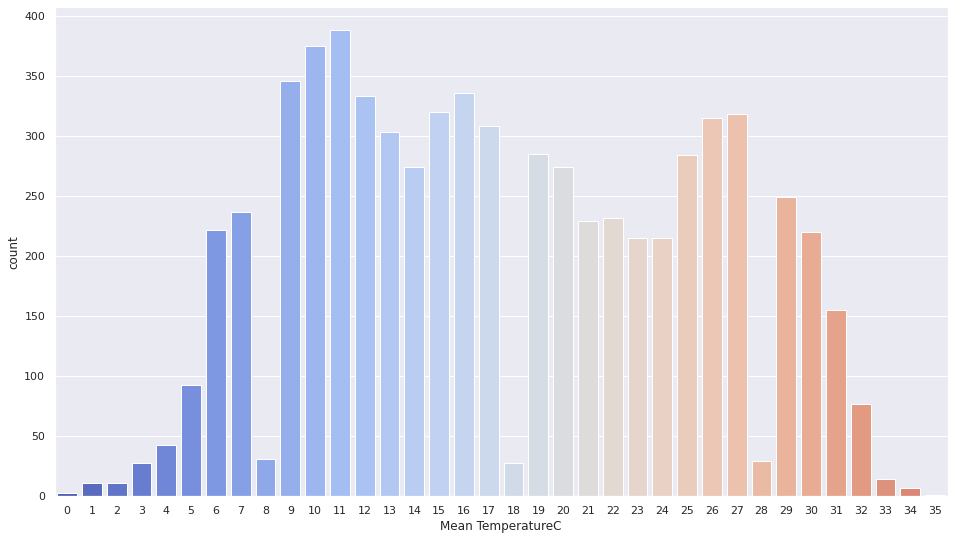

In [14]:
#Seaborn plot
sns.set(rc={'figure.figsize':(16,9)})
sns.countplot(x="Mean TemperatureC", data=dataset, palette=sns.color_palette("coolwarm", 42)).settitle=('Mean TemperatureC');

#Plot float as in in x-axis
from  matplotlib.ticker import FuncFormatter
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))

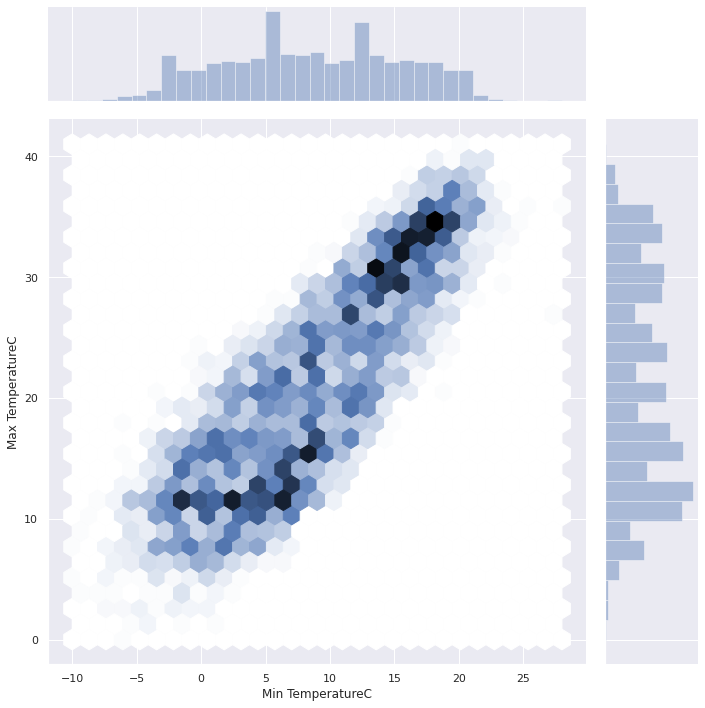

In [15]:
#kind{ scatter | reg | resid | kde | hex }
sns.jointplot(x='Min TemperatureC', y='Max TemperatureC', data=dataset, kind="hex", height=10); 

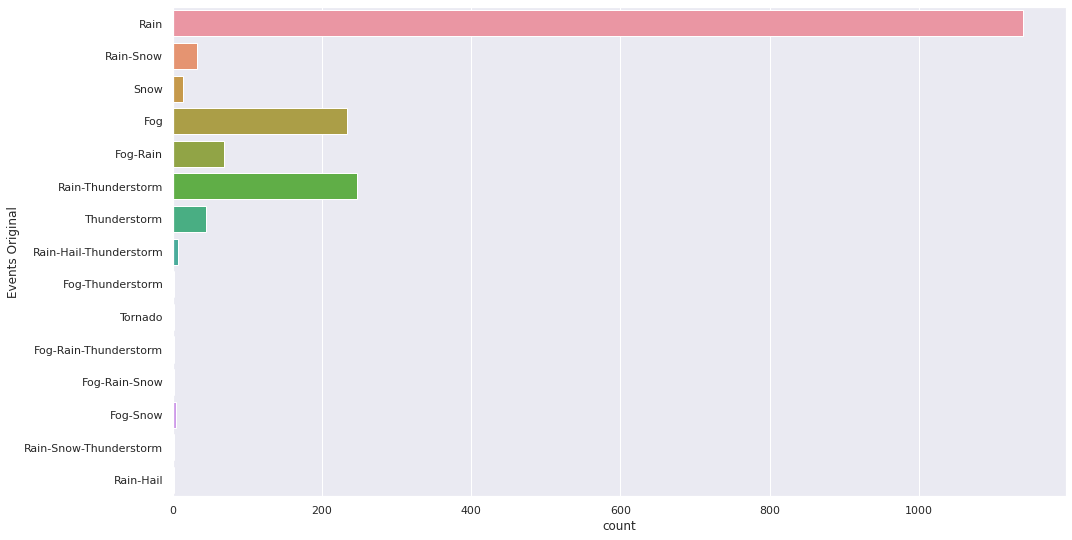

In [16]:
sns.countplot(y="Events Original", data=dataset);

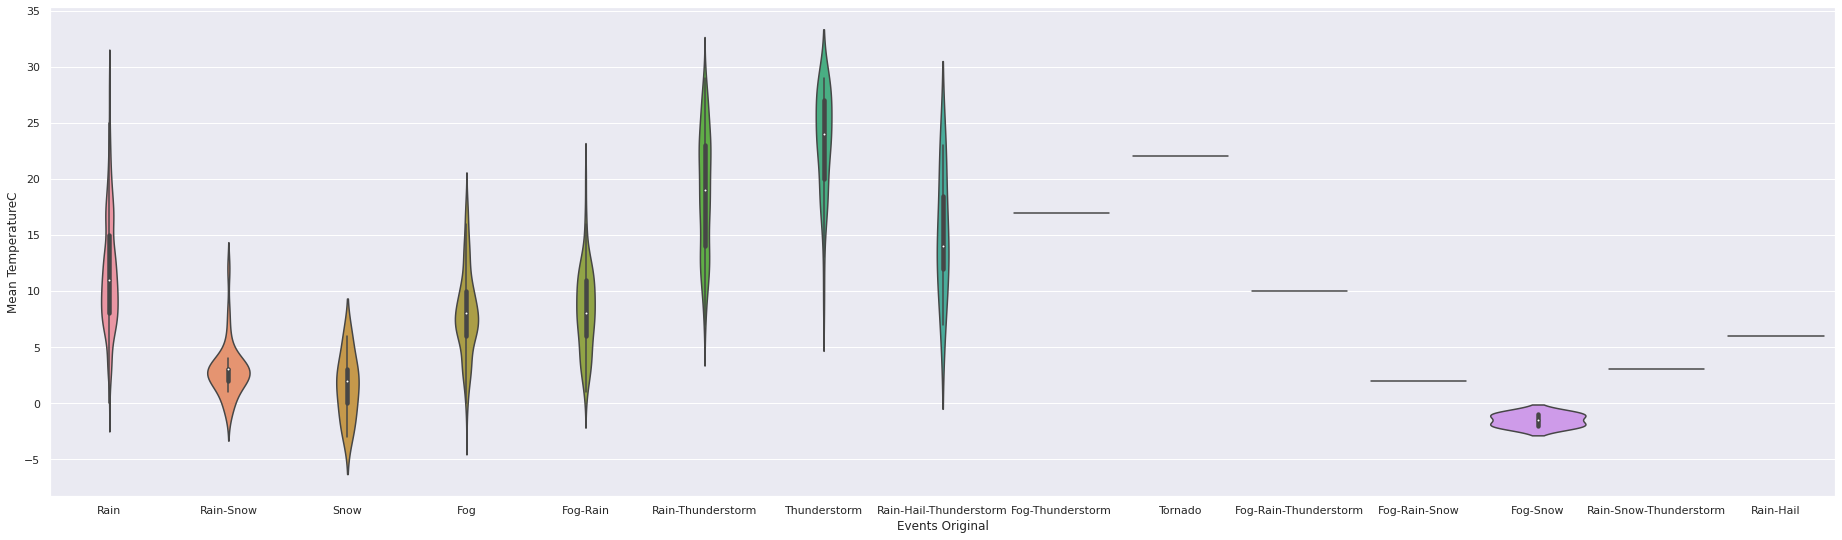

In [17]:
sns.set(rc={'figure.figsize':(32,9)})
sns.violinplot(x="Events Original", y="Mean TemperatureC", data=dataset);

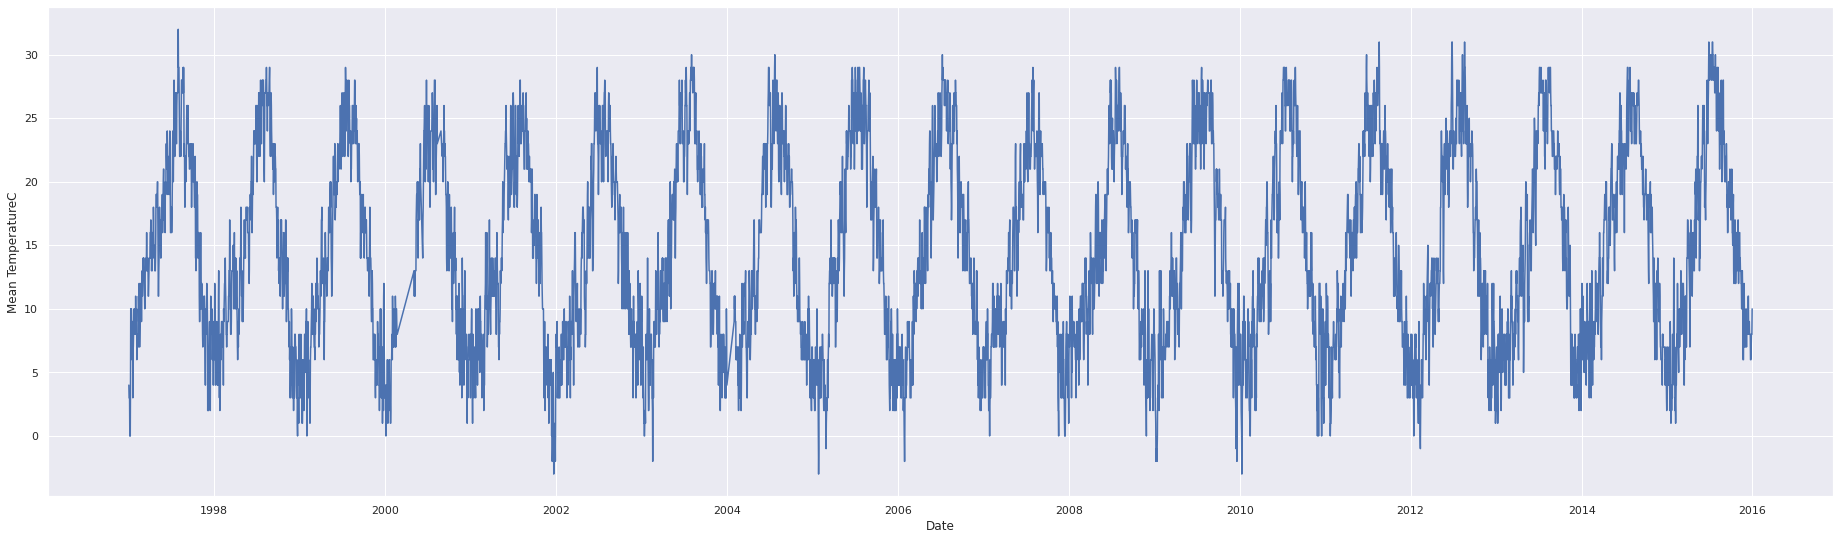

In [18]:
sns.lineplot(x="Date", y="Mean TemperatureC", data=dataset);

### Check for missing values

In [19]:
dataset.isna().sum()

Date                              0
Max TemperatureC                  2
Mean TemperatureC                 3
Min TemperatureC                  2
Dew PointC                        2
MeanDew PointC                    2
Min DewpointC                     2
Max Humidity                      2
 Mean Humidity                    2
 Min Humidity                     2
 Max Sea Level PressurehPa        0
 Mean Sea Level PressurehPa       0
 Min Sea Level PressurehPa        0
 Max VisibilityKm               940
 Mean VisibilityKm              940
 Min VisibilitykM               940
 Max Wind SpeedKm/h               0
 Mean Wind SpeedKm/h              0
 Max Gust SpeedKm/h            3306
Precipitationmm                   0
CloudCover                     1372
Events Original                5014
WindDirDegrees                    0
Events                            0
dtype: int64

### Check for missing dates

In [20]:
dataset['Date']

0      1997-01-01
1      1997-01-02
2      1997-01-03
3      1997-01-04
4      1997-01-05
          ...    
6807   2015-12-27
6808   2015-12-28
6809   2015-12-29
6810   2015-12-30
6811   2015-12-31
Name: Date, Length: 6812, dtype: datetime64[ns]

In [21]:
missing_dates = pd.date_range(start = '1997-01-01', end = '2015-12-31' ).difference(dataset['Date'])
len(missing_dates)

127

In [22]:
list(missing_dates)

[Timestamp('2000-02-23 00:00:00'),
 Timestamp('2000-02-24 00:00:00'),
 Timestamp('2000-02-25 00:00:00'),
 Timestamp('2000-02-26 00:00:00'),
 Timestamp('2000-02-27 00:00:00'),
 Timestamp('2000-02-28 00:00:00'),
 Timestamp('2000-02-29 00:00:00'),
 Timestamp('2000-03-01 00:00:00'),
 Timestamp('2000-03-02 00:00:00'),
 Timestamp('2000-03-03 00:00:00'),
 Timestamp('2000-03-04 00:00:00'),
 Timestamp('2000-03-05 00:00:00'),
 Timestamp('2000-03-06 00:00:00'),
 Timestamp('2000-03-07 00:00:00'),
 Timestamp('2000-03-08 00:00:00'),
 Timestamp('2000-03-09 00:00:00'),
 Timestamp('2000-03-10 00:00:00'),
 Timestamp('2000-03-11 00:00:00'),
 Timestamp('2000-03-12 00:00:00'),
 Timestamp('2000-03-13 00:00:00'),
 Timestamp('2000-03-14 00:00:00'),
 Timestamp('2000-03-15 00:00:00'),
 Timestamp('2000-03-16 00:00:00'),
 Timestamp('2000-03-17 00:00:00'),
 Timestamp('2000-03-18 00:00:00'),
 Timestamp('2000-03-19 00:00:00'),
 Timestamp('2000-03-20 00:00:00'),
 Timestamp('2000-03-21 00:00:00'),
 Timestamp('2000-03-

### Keep only records from '2004-02-01' and forward

In [23]:
dataset_original = dataset.copy(deep=True)

In [24]:
dataset.shape

(6812, 24)

In [25]:
dataset = dataset[dataset['Date'] >= '2004-02-01'].reset_index(drop=True)
dataset.shape

(4352, 24)

### Distribution and Correlation plots for key fields

In [26]:
mean_dataset = dataset[['Mean TemperatureC', 'MeanDew PointC', ' Mean Humidity', ' Mean Sea Level PressurehPa', ' Mean VisibilityKm', ' Mean Wind SpeedKm/h',
                        'Precipitationmm', 'CloudCover', 'WindDirDegrees', 'Events']]

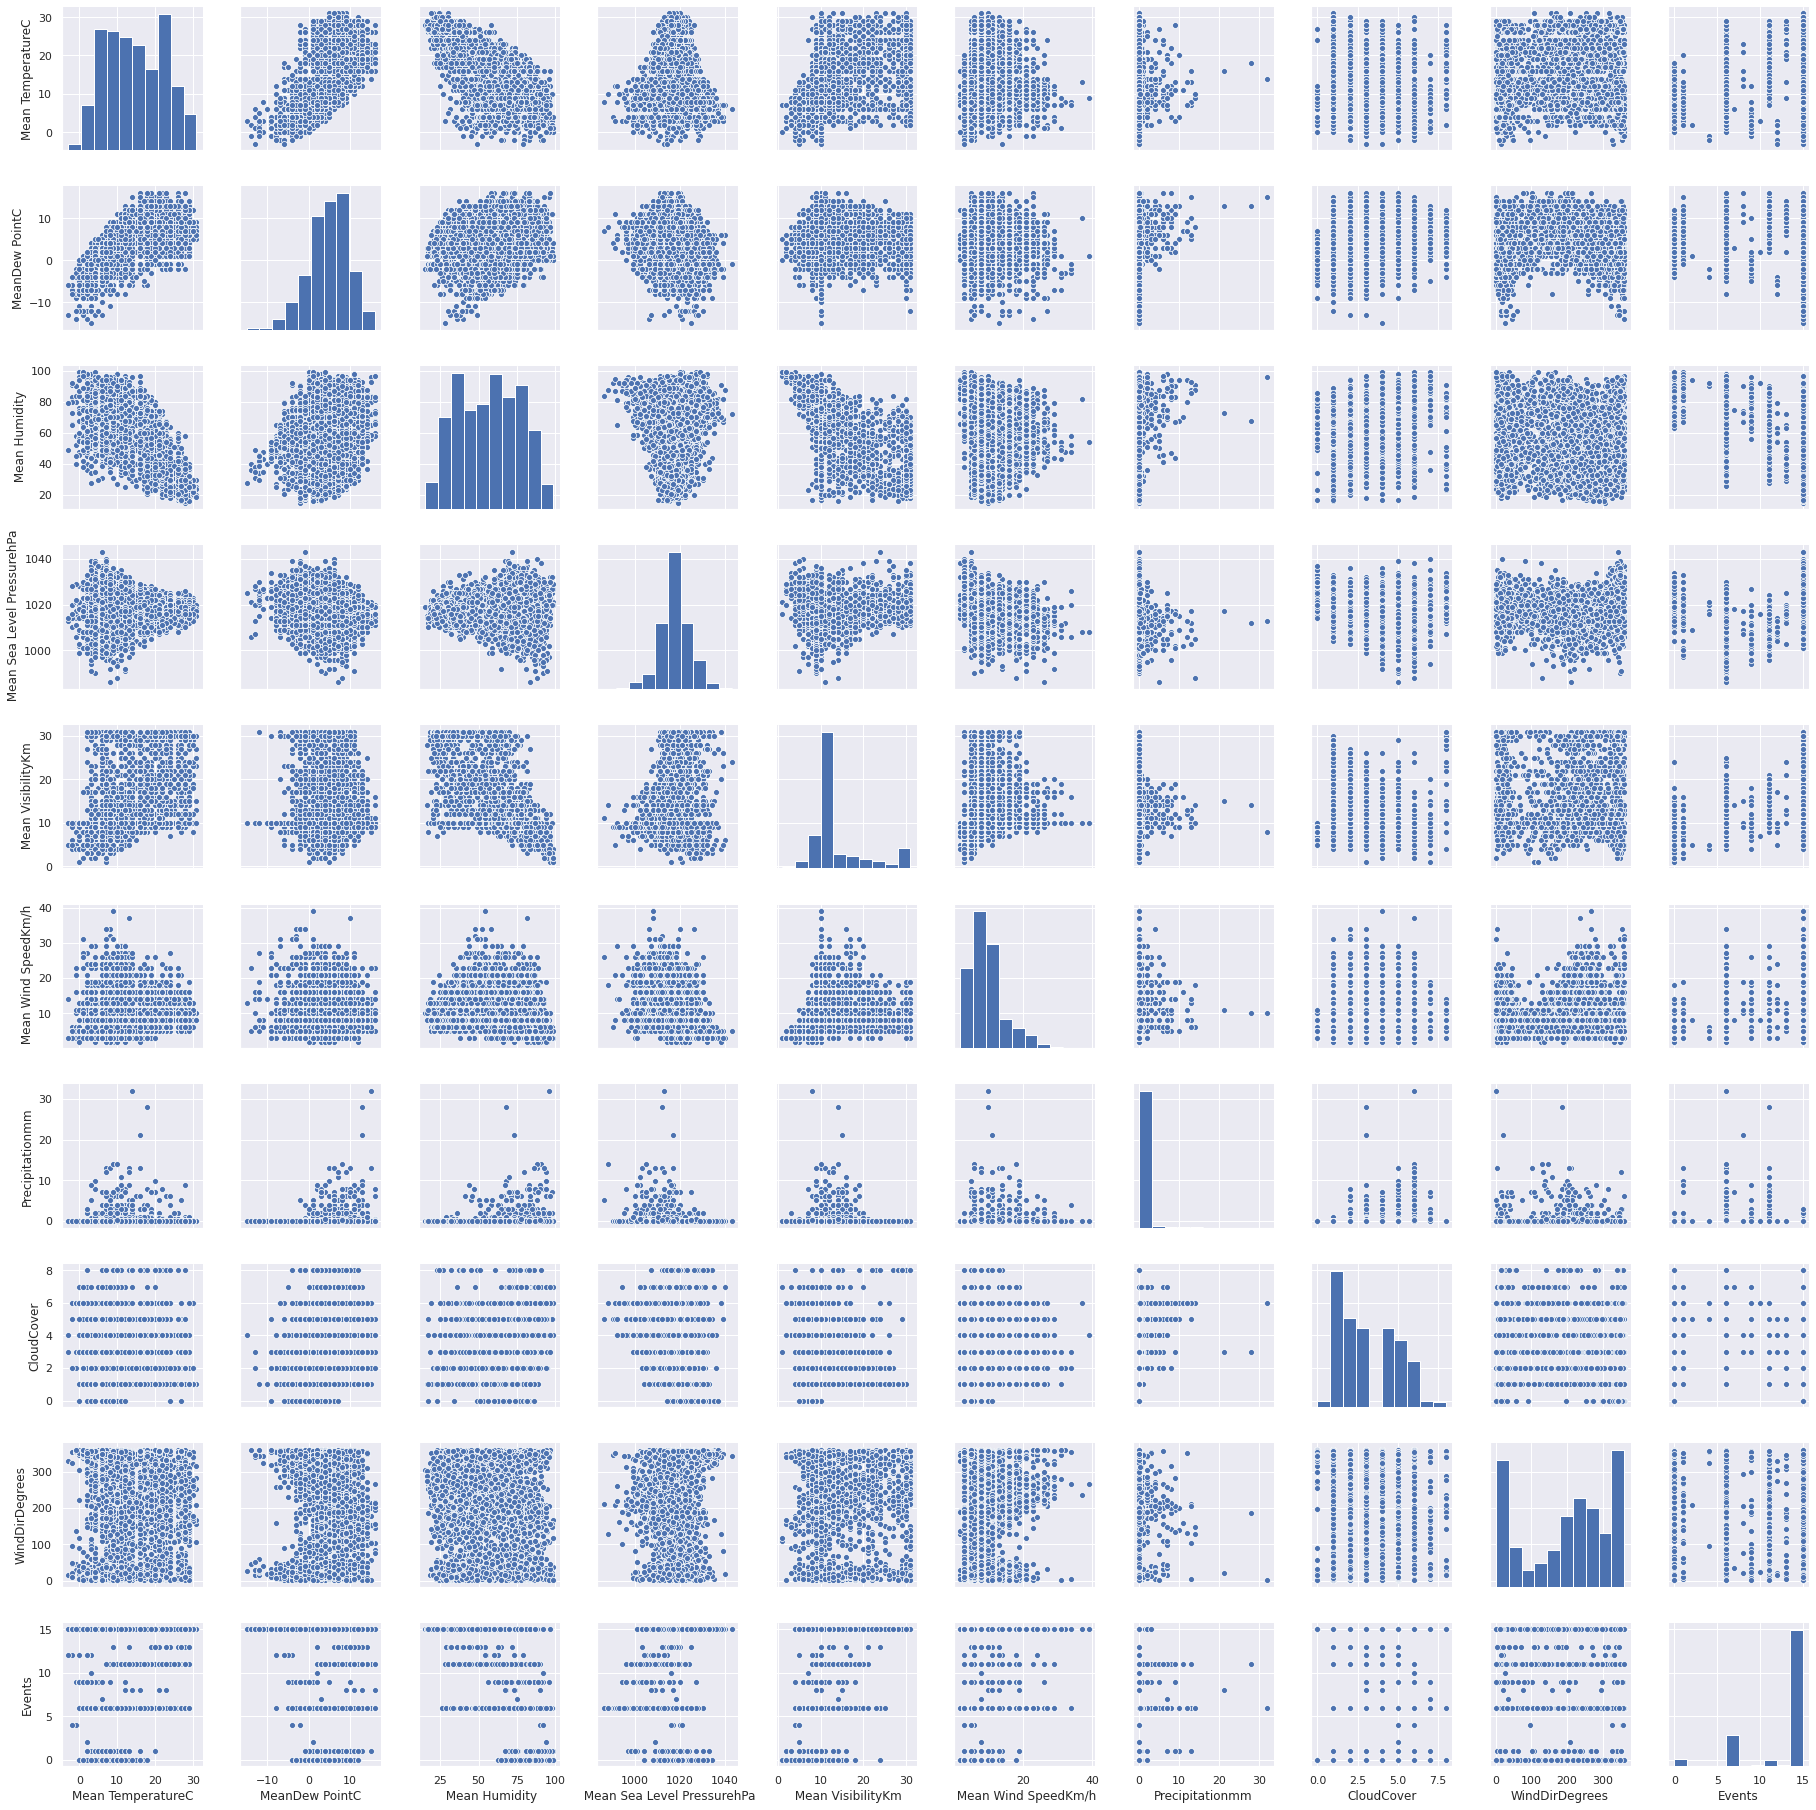

In [ ]:
#This take a while to run
sns.pairplot(mean_dataset);

### Train, Validaton and Test split

In [27]:
#Helpful method to plot series
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

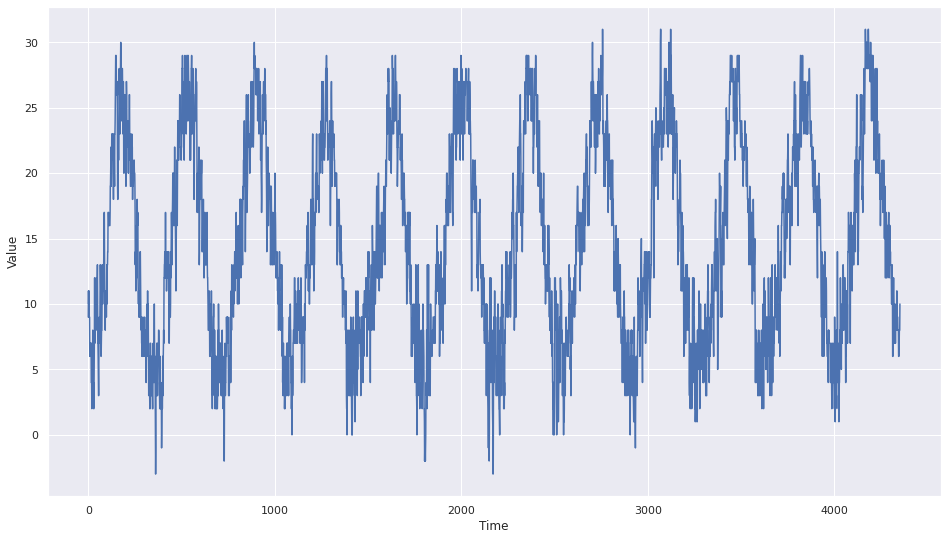

In [28]:
series = np.array(dataset['Mean TemperatureC'])
time = np.array(dataset.index)
plt.figure(figsize=(16, 9))
plot_series(time, series)

In [29]:
time

array([   0,    1,    2, ..., 4349, 4350, 4351])

In [30]:
dataset[dataset['Date'] == '2012-12-31']

Date  Max TemperatureC  ...  WindDirDegrees  Events
3256 2012-12-31               4.0  ...             147       1

[1 rows x 24 columns]

In [31]:
dataset[dataset['Date'] == '2012-12-31'].index[0]

3256

In [32]:
dataset.shape

(4352, 24)

In [33]:
split_time = dataset[dataset['Date'] == '2012-12-31'].index[0] + 1
time_train = time[:split_time]
x_train = series[:split_time]

time_test = time[split_time:]
x_test = series[split_time:]

validation_split_time = dataset[dataset['Date'] == '2010-12-31'].index[0] + 1
time_valid = time_train[validation_split_time:]
x_valid = x_train[validation_split_time:]

### Useful pre and post processing methods

In [34]:
def windowed_dataset_dnn(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [35]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

In [36]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [37]:
def plot_results(history):
  history = history.history

  fig, (ax1, ax2) = plt.subplots(2, 1, sharex='col', figsize=(16, 9))

  ax1.plot(history['loss'], label='Train loss')
  #ax1.plot(history['val_loss'], label='Validation loss')
  ax1.legend(loc='best')
  ax1.set_title('Loss')

  ax2.plot(history['mae'], label='Train mae')
  #ax2.plot(history['val_mae'], label='Validation mae')
  ax2.legend(loc='best')
  ax2.set_title('MAE')

  plt.xlabel('Epochs')
  sns.despine()
  plt.show()

In [38]:
def plot_multiple_results(history_list, offset=0):
  fig, (ax1, ax2) = plt.subplots(2, 1, sharex='col', figsize=(16, 9))

  count = 0
  for history in history_list:
    count+=1
    history = history.history
  
    ax1.plot(history['loss'][offset:], label='Train loss-v'+str(count))
    #ax1.plot(history['val_loss'], label='Validation loss')
    ax1.legend(loc='best')
    ax1.set_title('Loss')

    ax2.plot(history['mae'][offset:], label='Train mae-v'+str(count))
    #ax2.plot(history['val_mae'], label='Validation mae')
    ax2.legend(loc='best')
    ax2.set_title('MAE')

    plt.xlabel('Epochs')
    sns.despine()
plt.show()

## Model v1 - 3 layer DNN - MAE: 1.61

### Hyperparameter tuning

In [39]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

window_size = 30
batch_size = 32
shuffle_buffer_size = 1000

train_set =      windowed_dataset_dnn(x_train, window_size, batch_size, shuffle_buffer_size)
validation_set = windowed_dataset_dnn(x_valid, window_size, batch_size, shuffle_buffer_size)
test_set =       windowed_dataset_dnn(x_test, window_size, batch_size, shuffle_buffer_size)

### Model architecture

In [40]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, input_shape=[window_size], activation="relu"), 
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1)
])

#model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-7, momentum=0.9), metrics=['mae']) 
model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(), metrics=['mae'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                992       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________


### Setup and train our model

In [41]:
checkpoint_filepath = 'Time-Series-Prediction-Weather-data-Madrid-v1.h5'

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_filepath, verbose=0, save_weights_only=True, 
                                                      monitor='val_loss', mode='auto', save_best_only=True)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')

In [42]:
history_v1 = model.fit(train_set,
                       validation_data = validation_set,
                       epochs=100,
                       verbose=1,
                       callbacks=[model_checkpoint, early_stopping])

Epoch 1/100
101/101 [==============================] - 1s 6ms/step - loss: 19.3620 - mae: 3.1259 - val_loss: 6.9863 - val_mae: 2.0968
Epoch 2/100
101/101 [==============================] - 1s 5ms/step - loss: 6.9197 - mae: 2.0953 - val_loss: 5.9582 - val_mae: 1.9213
Epoch 3/100
101/101 [==============================] - 1s 5ms/step - loss: 5.8062 - mae: 1.9173 - val_loss: 5.1383 - val_mae: 1.7986
Epoch 4/100
101/101 [==============================] - 1s 5ms/step - loss: 5.1782 - mae: 1.8143 - val_loss: 4.7219 - val_mae: 1.7239
Epoch 5/100
101/101 [==============================] - 1s 5ms/step - loss: 4.8939 - mae: 1.7538 - val_loss: 5.1248 - val_mae: 1.7550
Epoch 6/100
101/101 [==============================] - 0s 5ms/step - loss: 4.7728 - mae: 1.7298 - val_loss: 4.6136 - val_mae: 1.6633
Epoch 7/100
101/101 [==============================] - 1s 5ms/step - loss: 4.4661 - mae: 1.6716 - val_loss: 4.1387 - val_mae: 1.6085
Epoch 8/100
101/101 [==============================] - 1s 5ms/step -

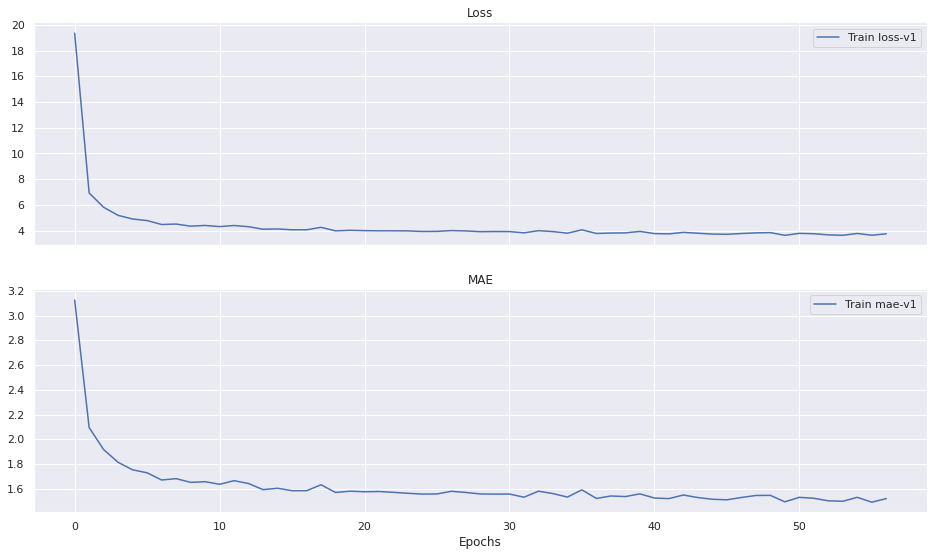

In [43]:
plot_multiple_results([history_v1])

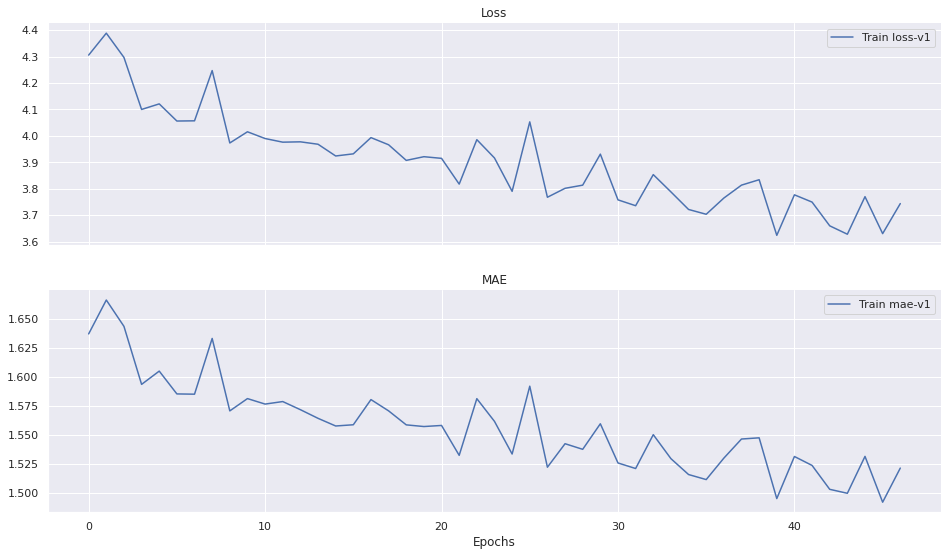

In [44]:
plot_multiple_results([history_v1], offset=10)

In [128]:
#forecast=[]
#for time in range(len(series) - window_size):
#  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

#forecast = forecast[split_time-window_size:]
#results = np.array(forecast)[:, 0, 0]

In [84]:
forecast = model_forecast(model, series, window_size)
results = forecast[split_time - window_size:-1, 0]

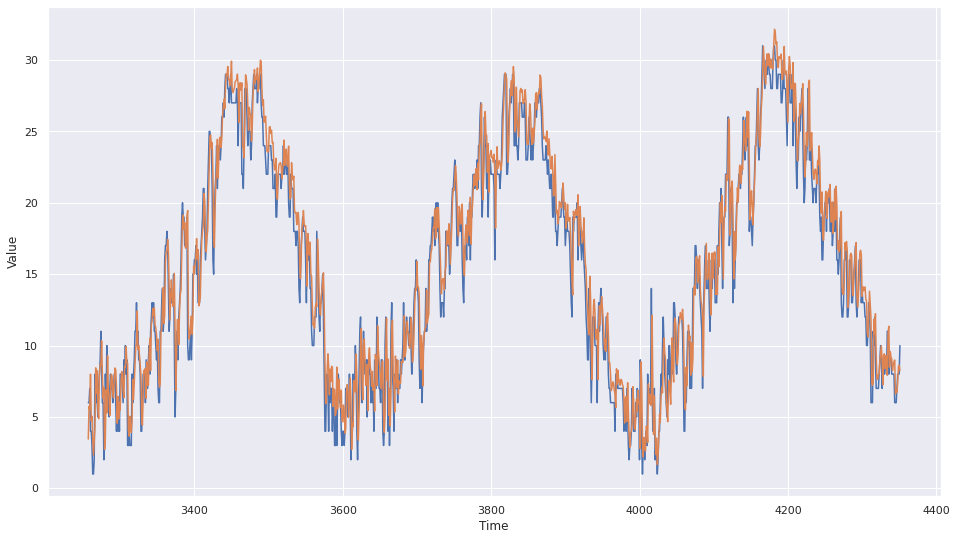

In [86]:
plt.figure(figsize=(16, 9))

plot_series(time_test, x_test)
plot_series(time_test, results)
#Look at zoomed version

### MAE and MSE on test set

In [87]:
mae = tf.keras.metrics.mean_absolute_error(x_test, results).numpy()
mae

1.616005

In [88]:
mse = tf.keras.metrics.mean_squared_error(x_test, results).numpy()
mse

4.3735466

In [89]:
report = pd.DataFrame(columns=['Model', 'MAE', 'MSE'])
report.loc[len(report)] = ['Univariate 3 layer DNN 10 + SGD', 2.008685, 6.347851]
report.loc[len(report)] = ['Univariate Conv1D, 2x LSTM, 3 layer DNN 10 + SGD', 1.801992, 5.175402]
report.loc[len(report)] = ['Univariate 3 layer DNN 16 + Adam', mae, mse]

In [90]:
report

Model       MAE       MSE
0                   Univariate 3 layer DNN 10 + SGD  2.008685  6.347851
1  Univariate Conv1D, 2x LSTM, 3 layer DNN 10 + SGD  1.801992  5.175402
2                  Univariate 3 layer DNN 16 + Adam  1.616005  4.373547

## Model v2 - Conv1D, 2x LSTM, 3 layer DNN, Lambda - MAE: 1.55

### Hyperparameter tuning

In [91]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

window_size = 64
batch_size = 256
shuffle_buffer_size = 1000

train_set =       windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
validation_set =  windowed_dataset(x_valid, window_size, batch_size, shuffle_buffer_size)
test_set =        windowed_dataset(x_test, window_size, batch_size, shuffle_buffer_size)

### Model architecture

In [92]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(32, activation="relu"),
  tf.keras.layers.Dense(16, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(), metrics=['mae'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, None, 32)          192       
_________________________________________________________________
lstm (LSTM)                  (None, None, 64)          24832     
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 64)          33024     
_________________________________________________________________
dense (Dense)                (None, None, 32)          2080      
_________________________________________________________________
dense_1 (Dense)              (None, None, 16)          528       
_________________________________________________________________
dense_2 (Dense)              (None, None, 1)           17        
_________________________________________________________________
lambda (Lambda)              (None, None, 1)           0

### Setup and train our model

In [94]:
checkpoint_filepath = 'Time-Series-Prediction-Weather-data-Madrid-v2.h5'

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_filepath, verbose=0, save_weights_only=True, 
                                                      monitor='val_loss', mode='auto', save_best_only=True)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')

In [95]:
history_v2 = model.fit(train_set,
                       validation_data = validation_set,
                       epochs=100,
                       verbose=1,
                       callbacks=[model_checkpoint, early_stopping])

Epoch 1/100
13/13 [==============================] - 1s 80ms/step - loss: 567.1725 - mae: 15.5342 - val_loss: 34.5743 - val_mae: 4.6183
Epoch 2/100
13/13 [==============================] - 0s 35ms/step - loss: 27.7684 - mae: 4.1791 - val_loss: 18.4356 - val_mae: 3.5112
Epoch 3/100
13/13 [==============================] - 0s 35ms/step - loss: 14.4028 - mae: 3.0660 - val_loss: 11.8600 - val_mae: 2.7437
Epoch 4/100
13/13 [==============================] - 0s 33ms/step - loss: 10.2507 - mae: 2.5586 - val_loss: 9.6920 - val_mae: 2.4866
Epoch 5/100
13/13 [==============================] - 0s 35ms/step - loss: 9.0465 - mae: 2.4041 - val_loss: 8.5948 - val_mae: 2.3413
Epoch 6/100
13/13 [==============================] - 0s 35ms/step - loss: 8.3399 - mae: 2.3078 - val_loss: 8.2144 - val_mae: 2.2906
Epoch 7/100
13/13 [==============================] - 0s 36ms/step - loss: 7.8946 - mae: 2.2437 - val_loss: 7.7390 - val_mae: 2.2178
Epoch 8/100
13/13 [==============================] - 0s 37ms/step -

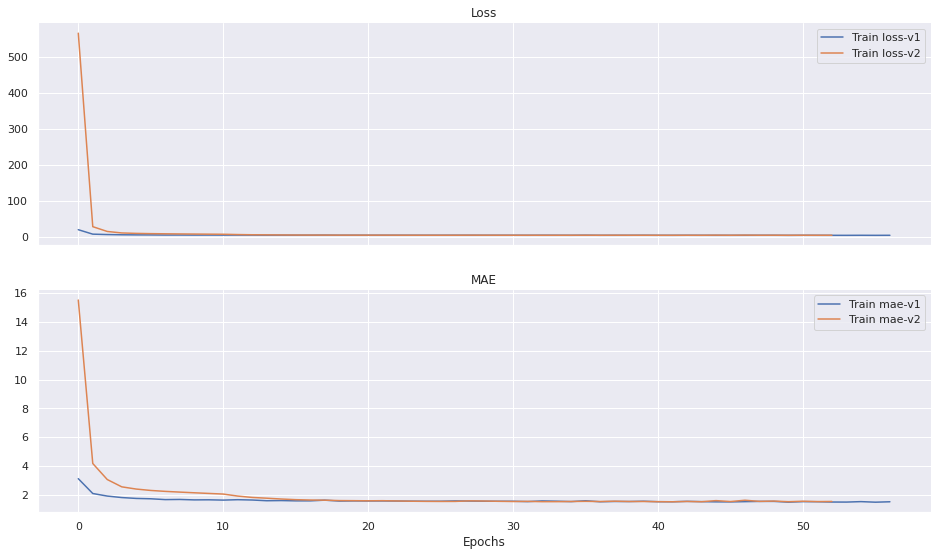

In [96]:
plot_multiple_results([history_v1, history_v2])

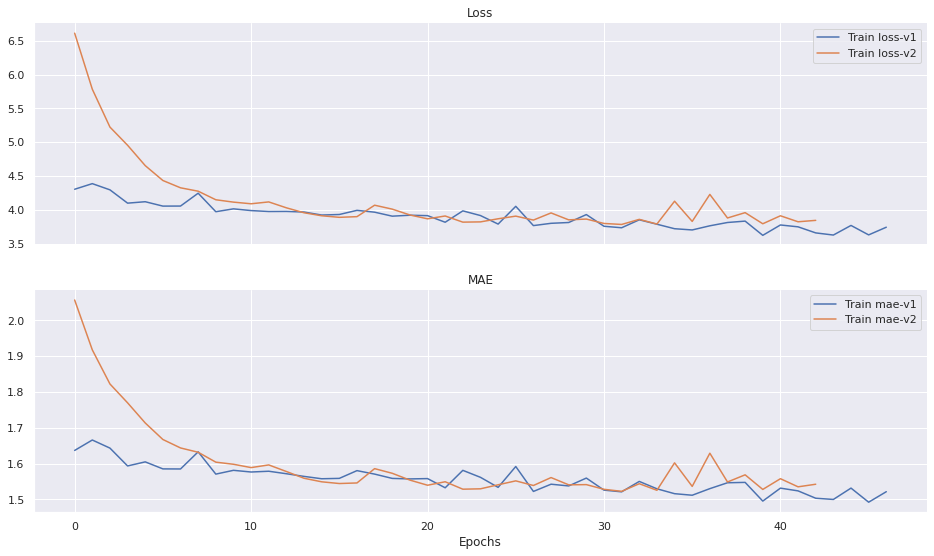

In [97]:
plot_multiple_results([history_v1, history_v2], offset=10)

In [98]:
rnn_forecast = model_forecast(model, series[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

In [99]:
rnn_forecast

array([1.7792953, 5.355618 , 5.586444 , ..., 8.717313 , 8.67461  ,
       8.718241 ], dtype=float32)

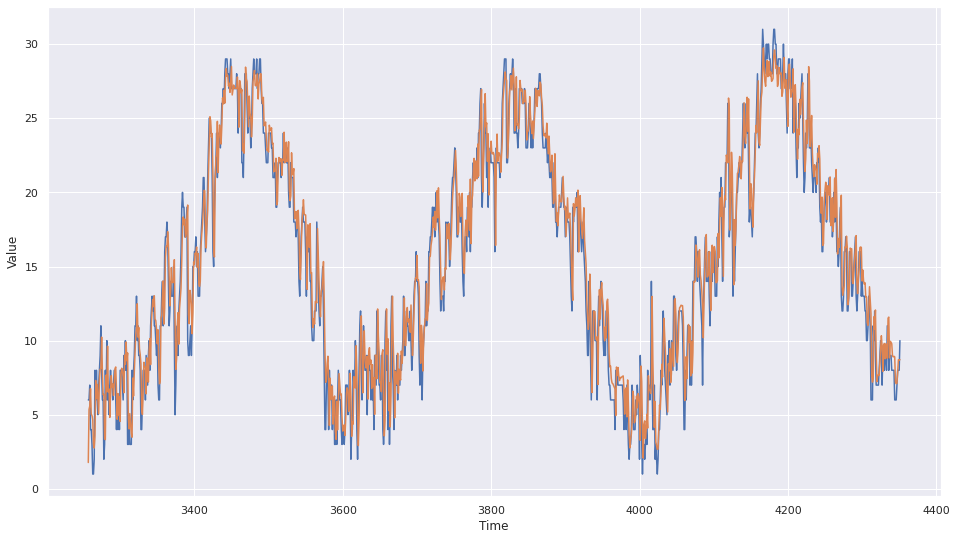

In [100]:
plt.figure(figsize=(16, 9))
plot_series(time_test, x_test)
plot_series(time_test, rnn_forecast)

### MAE and MSE on test set

In [101]:
mae = tf.keras.metrics.mean_absolute_error(x_test, rnn_forecast).numpy()
mae

1.5488396

In [102]:
mse = tf.keras.metrics.mean_squared_error(x_test, rnn_forecast).numpy()
mse

4.069838

In [103]:
report.loc[len(report)] = ['Univariate Conv1D, 2x LSTM, 3 layer DNN 16 + Adam', mae, mse]

In [104]:
report

Model       MAE       MSE
0                    Univariate 3 layer DNN 10 + SGD  2.008685  6.347851
1   Univariate Conv1D, 2x LSTM, 3 layer DNN 10 + SGD  1.801992  5.175402
2                   Univariate 3 layer DNN 16 + Adam  1.616005  4.373547
3  Univariate Conv1D, 2x LSTM, 3 layer DNN 16 + Adam  1.548840  4.069838

## Model v3 - 2x LSTM, 3 layer DNN, Lambda - MAE: 1.55

### Hyperparameter tuning

In [105]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

window_size = 64
batch_size = 256
shuffle_buffer_size = 1000

train_set =       windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
validation_set =  windowed_dataset(x_valid, window_size, batch_size, shuffle_buffer_size)
test_set =        windowed_dataset(x_test, window_size, batch_size, shuffle_buffer_size)

### Model architecture

In [106]:
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(64, input_shape=[None, 1], return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(32, activation="relu"),
  tf.keras.layers.Dense(16, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(), metrics=['mae'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, None, 64)          16896     
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 64)          33024     
_________________________________________________________________
dense (Dense)                (None, None, 32)          2080      
_________________________________________________________________
dense_1 (Dense)              (None, None, 16)          528       
_________________________________________________________________
dense_2 (Dense)              (None, None, 1)           17        
_________________________________________________________________
lambda (Lambda)              (None, None, 1)           0         
Total params: 52,545
Trainable params: 52,545
Non-trainable params: 0
____________________________________________________

### Setup and train our model

In [107]:
checkpoint_filepath = 'Time-Series-Prediction-Weather-data-Madrid-v3.h5'

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_filepath, verbose=0, save_weights_only=True, 
                                                      monitor='val_loss', mode='auto', save_best_only=True)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')

In [108]:
history_v3 = model.fit(train_set,
                       validation_data = validation_set,
                       epochs=100,
                       verbose=1,
                       callbacks=[model_checkpoint, early_stopping])

Epoch 1/100
13/13 [==============================] - 1s 74ms/step - loss: 595.5633 - mae: 17.3225 - val_loss: 87.6828 - val_mae: 8.0238
Epoch 2/100
13/13 [==============================] - 0s 34ms/step - loss: 47.6615 - mae: 5.5173 - val_loss: 19.6574 - val_mae: 3.5672
Epoch 3/100
13/13 [==============================] - 0s 34ms/step - loss: 19.2924 - mae: 3.4986 - val_loss: 12.8618 - val_mae: 2.8481
Epoch 4/100
13/13 [==============================] - 0s 33ms/step - loss: 12.4914 - mae: 2.8161 - val_loss: 10.5843 - val_mae: 2.5550
Epoch 5/100
13/13 [==============================] - 0s 34ms/step - loss: 9.8843 - mae: 2.4839 - val_loss: 9.2623 - val_mae: 2.3957
Epoch 6/100
13/13 [==============================] - 0s 33ms/step - loss: 8.8244 - mae: 2.3470 - val_loss: 8.2132 - val_mae: 2.2459
Epoch 7/100
13/13 [==============================] - 0s 35ms/step - loss: 8.1324 - mae: 2.2567 - val_loss: 7.6776 - val_mae: 2.1759
Epoch 8/100
13/13 [==============================] - 0s 34ms/step 

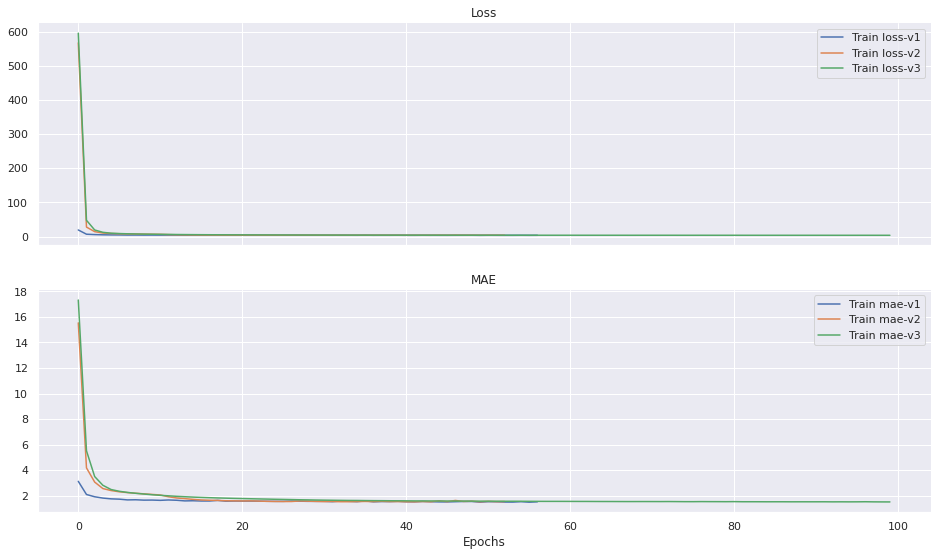

In [109]:
plot_multiple_results([history_v1, history_v2, history_v3])

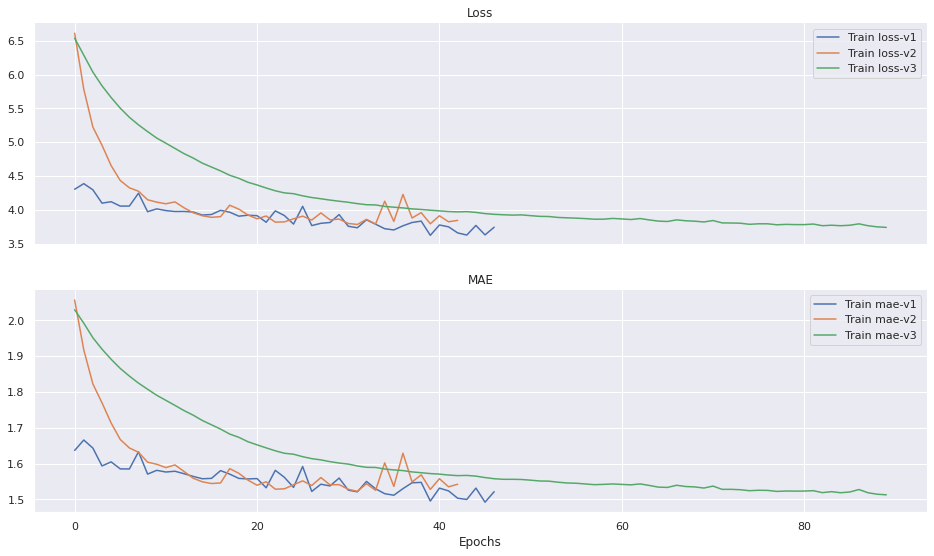

In [110]:
plot_multiple_results([history_v1, history_v2, history_v3], offset=10)

In [111]:
rnn_forecast = model_forecast(model, series[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

In [112]:
rnn_forecast

array([3.134189 , 5.6404867, 6.182537 , ..., 7.892887 , 7.8952813,
       7.8708467], dtype=float32)

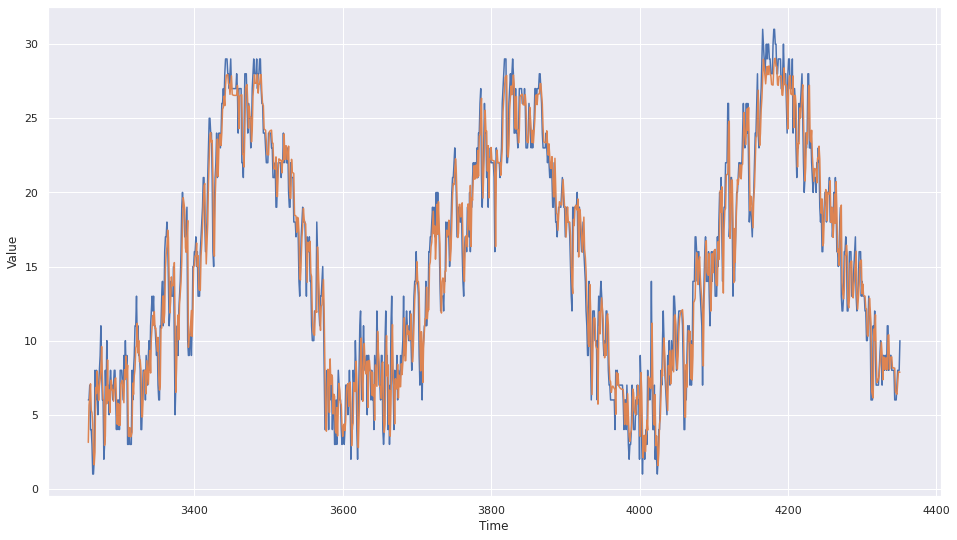

In [113]:
plt.figure(figsize=(16, 9))
plot_series(time_test, x_test)
plot_series(time_test, rnn_forecast)

### MAE and MSE on test set

In [114]:
mae = tf.keras.metrics.mean_absolute_error(x_test, rnn_forecast).numpy()
mae

1.5085355

In [115]:
mse = tf.keras.metrics.mean_squared_error(x_test, rnn_forecast).numpy()
mse

3.8091486

In [116]:
report.loc[len(report)] = ['Univariate 2x LSTM, 3 layer DNN 16 + Adam', mae, mse]

In [117]:
report

Model       MAE       MSE
0                    Univariate 3 layer DNN 10 + SGD  2.008685  6.347851
1   Univariate Conv1D, 2x LSTM, 3 layer DNN 10 + SGD  1.801992  5.175402
2                   Univariate 3 layer DNN 16 + Adam  1.616005  4.373547
3  Univariate Conv1D, 2x LSTM, 3 layer DNN 16 + Adam  1.548840  4.069838
4          Univariate 2x LSTM, 3 layer DNN 16 + Adam  1.508536  3.809149

## Model v4 - 3 layer DNN, Normalization, BatchNorm - MAE: 1.63

### Normalize Mean TemperatureC

In [177]:
def normalize_series(series, min, max):
  return (series - min) / (max - min)

In [178]:
def inverse_normalize_series(series, min, max):
  return (series * (max - min)) + min

In [179]:
def standardize_series(series, mean, std):
  return (series - mean) / std

In [180]:
def inverse_standardize_series(series, mean, std):
  return (series * std) + mean

In [142]:
min_x_train = np.min(x_train)
max_x_train = np.max(x_train)
mean_x_train = np.mean(x_train)
std_x_train = np.std(x_train)
print(min_x_train, max_x_train, mean_x_train, std_x_train)

-3.0 31.0 14.591034694504145 7.7255513958549775


In [143]:
x_train[:10]

array([ 9., 11., 10., 11., 11.,  9.,  9.,  9.,  6.,  7.])

In [144]:
normalize_xtrain = normalize_series(x_train[:10], min_x_train, max_x_train)
normalize_xtrain

array([0.35294118, 0.41176471, 0.38235294, 0.41176471, 0.41176471,
       0.35294118, 0.35294118, 0.35294118, 0.26470588, 0.29411765])

In [145]:
inverse_normalize_series(normalize_xtrain, min_x_train, max_x_train)

array([ 9., 11., 10., 11., 11.,  9.,  9.,  9.,  6.,  7.])

In [152]:
standardize_xtrain = standardize_series(x_train[:10], mean_x_train, std_x_train)
standardize_xtrain

array([-0.72370688, -0.46482568, -0.59426628, -0.46482568, -0.46482568,
       -0.72370688, -0.72370688, -0.72370688, -1.11202868, -0.98258808])

In [153]:
inverse_standardize_series(standardize_xtrain, mean_x_train, std_x_train)

array([ 9., 11., 10., 11., 11.,  9.,  9.,  9.,  6.,  7.])

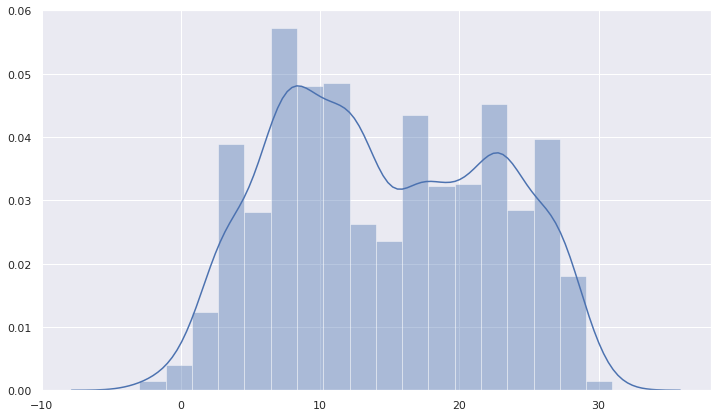

In [154]:
sns.set(rc={'figure.figsize':(12,7)})
sns.distplot(x_train);

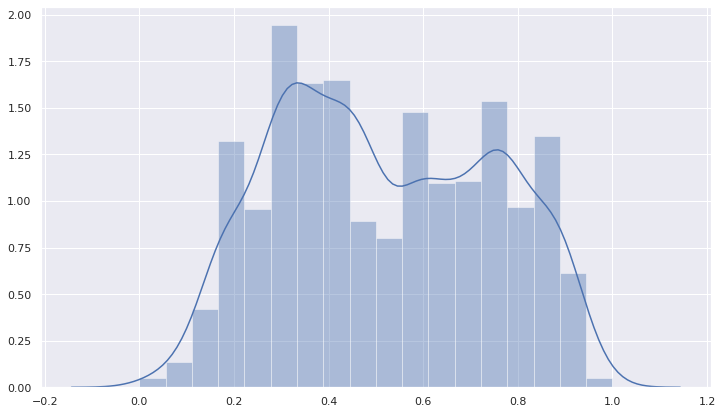

In [155]:
sns.distplot(normalize_series(x_train, min_x_train, max_x_train));

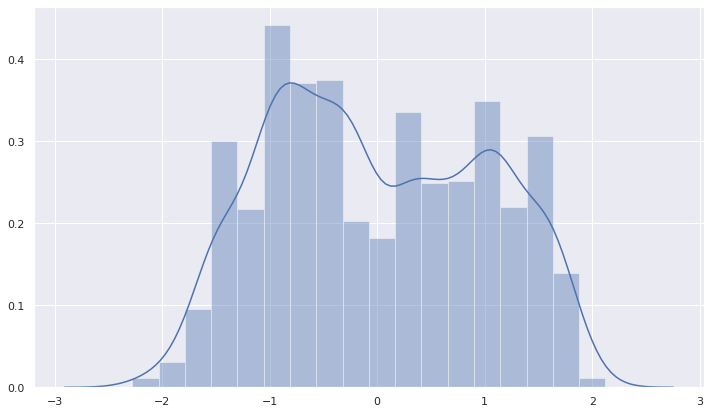

In [156]:
sns.distplot(standardize_series(x_train, mean_x_train, std_x_train));

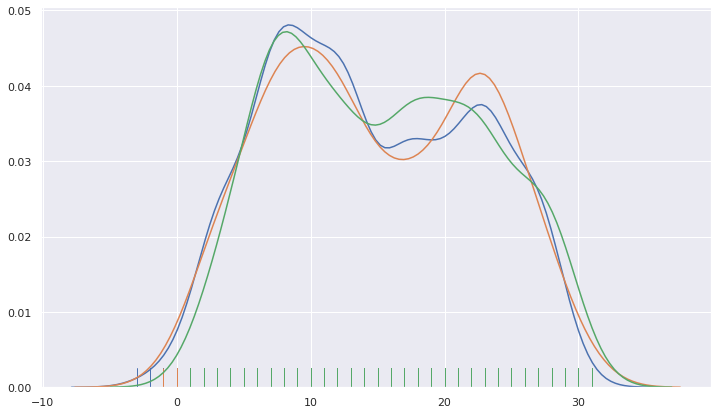

In [157]:
sns.distplot(x_train, hist=False, rug=True)
sns.distplot(x_valid, hist=False, rug=True)
sns.distplot(x_test, hist=False, rug=True)
plt.show()

In [158]:
normalize_x_train = normalize_series(x_train, min_x_train, max_x_train)
normalize_x_valid = normalize_series(x_valid, min_x_train, max_x_train)
normalize_x_test = normalize_series(x_test, min_x_train, max_x_train)

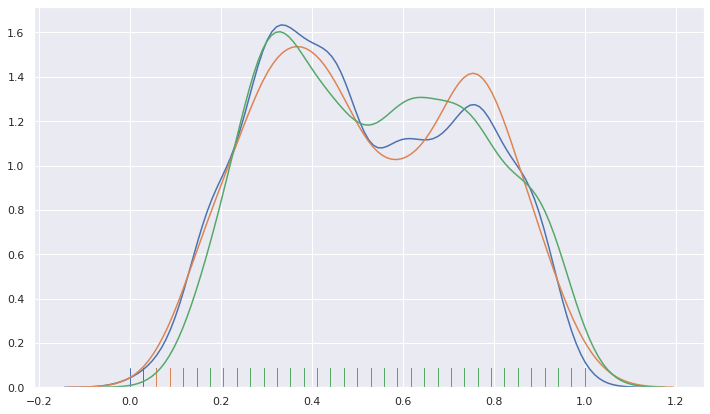

In [159]:
sns.distplot(normalize_x_train, hist=False, rug=True)
sns.distplot(normalize_x_valid, hist=False, rug=True)
sns.distplot(normalize_x_test, hist=False, rug=True)
plt.show()

### Hyperparameter tuning

In [160]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

window_size = 30
batch_size = 32
shuffle_buffer_size = 1000

train_set =      windowed_dataset_dnn(normalize_x_train, window_size, batch_size, shuffle_buffer_size)
validation_set = windowed_dataset_dnn(normalize_x_valid, window_size, batch_size, shuffle_buffer_size)
test_set =       windowed_dataset_dnn(normalize_x_test, window_size, batch_size, shuffle_buffer_size)

### Model architecture

In [161]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, input_shape=[window_size], activation="relu"), 
    tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

#model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-7, momentum=0.9), metrics=['mae']) 
model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(), metrics=['mae'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                992       
_________________________________________________________________
batch_normalization (BatchNo (None, 32)                128       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
batch_normalization_1 (Batch (None, 16)                64        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 1,729
Trainable params: 1,633
Non-trainable params: 96
_________________________________________________________________


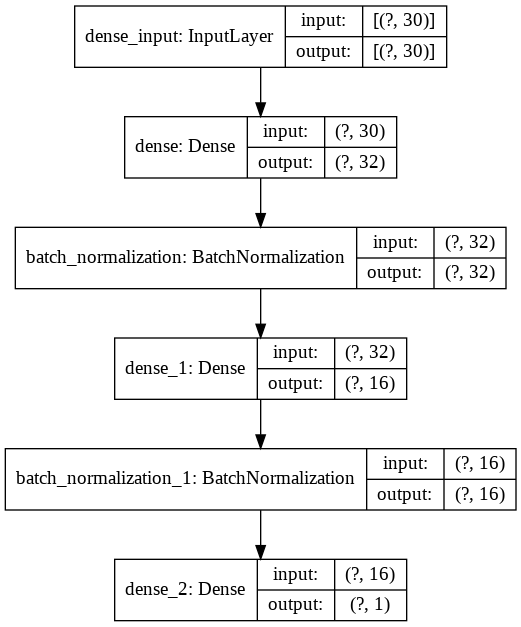

In [163]:
model_plot = 'Time-Series-Prediction-Weather-data-Madrid-v4.png'
tf.keras.utils.plot_model(model, to_file=model_plot, show_shapes=True)

### Setup and train our model

In [164]:
checkpoint_filepath = 'Time-Series-Prediction-Weather-data-Madrid-v4.h5'

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_filepath, verbose=0, save_weights_only=True, 
                                                      monitor='val_loss', mode='auto', save_best_only=True)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')

In [165]:
history_v4 = model.fit(train_set,
                       validation_data = validation_set,
                       epochs=100,
                       verbose=1,
                       callbacks=[model_checkpoint, early_stopping])

Epoch 1/100
101/101 [==============================] - 1s 6ms/step - loss: 0.3232 - mae: 0.3962 - val_loss: 0.1797 - val_mae: 0.3410
Epoch 2/100
101/101 [==============================] - 1s 6ms/step - loss: 0.0418 - mae: 0.1586 - val_loss: 0.0877 - val_mae: 0.2312
Epoch 3/100
101/101 [==============================] - 1s 6ms/step - loss: 0.0234 - mae: 0.1193 - val_loss: 0.0377 - val_mae: 0.1529
Epoch 4/100
101/101 [==============================] - 1s 6ms/step - loss: 0.0159 - mae: 0.0998 - val_loss: 0.0131 - val_mae: 0.0920
Epoch 5/100
101/101 [==============================] - 1s 6ms/step - loss: 0.0129 - mae: 0.0896 - val_loss: 0.0108 - val_mae: 0.0840
Epoch 6/100
101/101 [==============================] - 1s 6ms/step - loss: 0.0099 - mae: 0.0780 - val_loss: 0.0079 - val_mae: 0.0703
Epoch 7/100
101/101 [==============================] - 1s 6ms/step - loss: 0.0096 - mae: 0.0776 - val_loss: 0.0079 - val_mae: 0.0698
Epoch 8/100
101/101 [==============================] - 1s 6ms/step - 

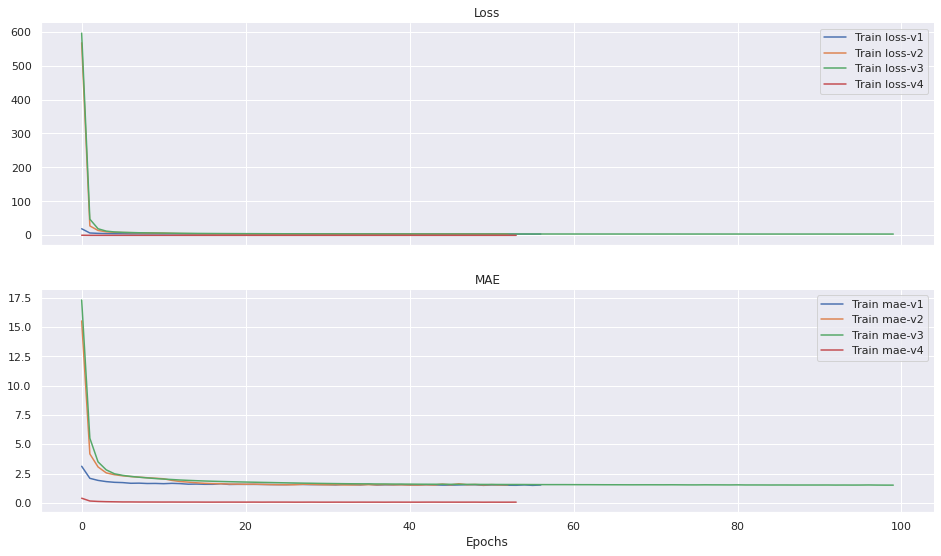

In [167]:
plot_multiple_results([history_v1, history_v2, history_v3, history_v4], offset=0)

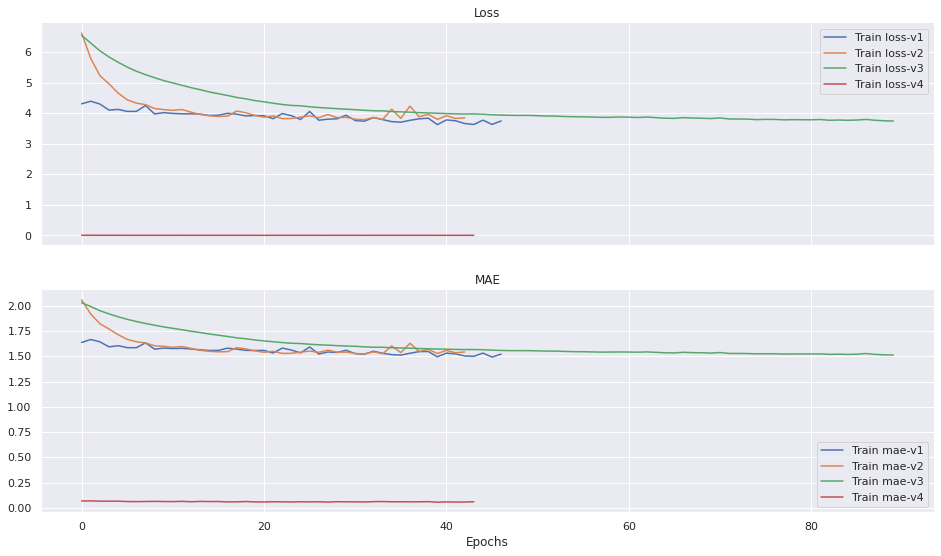

In [168]:
plot_multiple_results([history_v1, history_v2, history_v3, history_v4], offset=10)

In [226]:
norm_series = normalize_series(series, min_x_train, max_x_train)
normalize_x_test = normalize_series(x_test, min_x_train, max_x_train)

In [182]:
forecast = model_forecast(model, norm_series, window_size)
results = forecast[split_time - window_size:-1, 0]

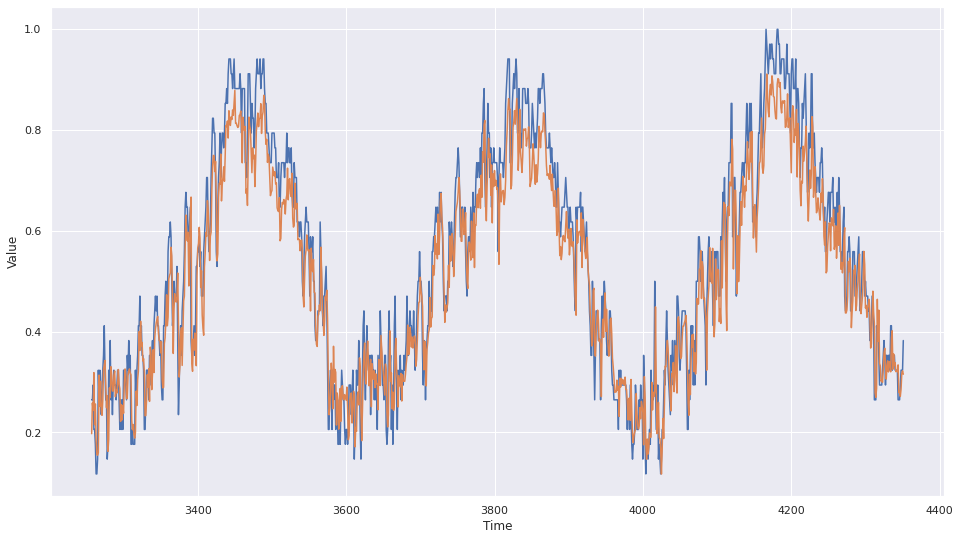

In [186]:
plt.figure(figsize=(16, 9))
plot_series(time_test, normalize_x_test)
plot_series(time_test, results)

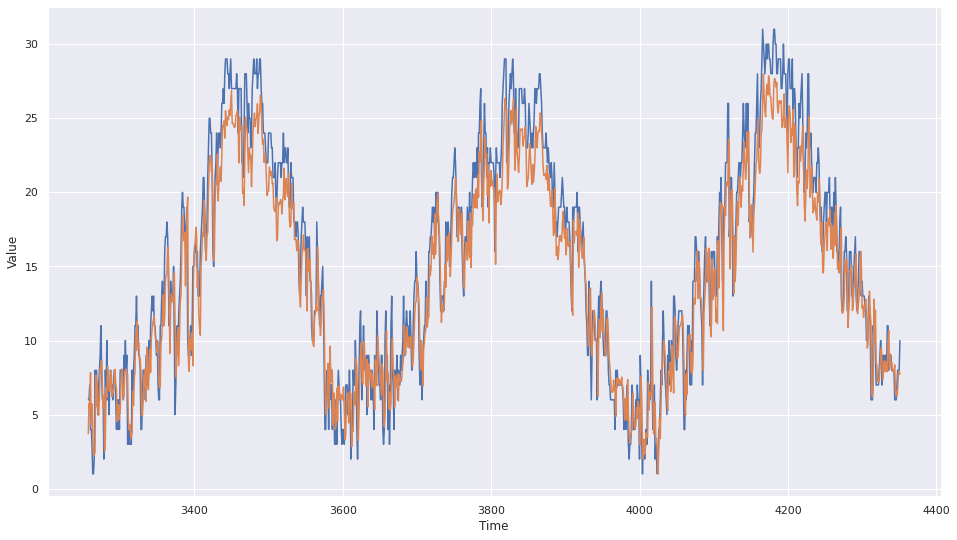

In [187]:
plt.figure(figsize=(16, 9))
plot_series(time_test, x_test)
plot_series(time_test, inverse_normalize_series(results, min_x_train, max_x_train))

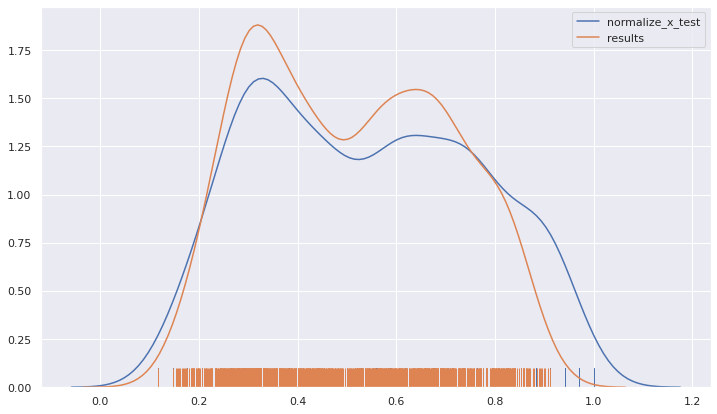

In [189]:
sns.distplot(normalize_x_test, hist=False, rug=True, label='normalize_x_test')
sns.distplot(results, hist=False, rug=True, label='results')
plt.show()

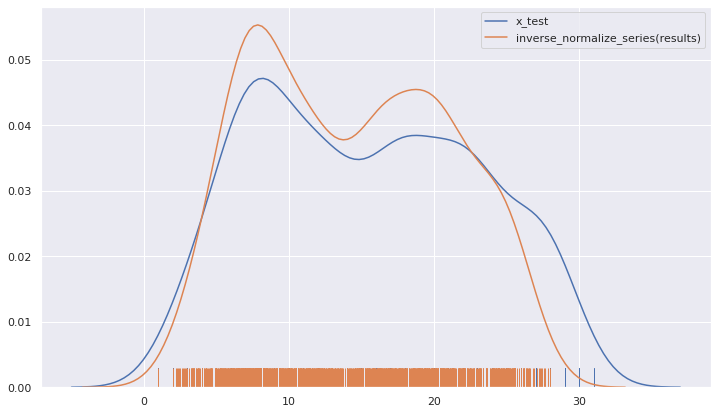

In [190]:
sns.distplot(x_test, hist=False, rug=True, label='x_test')
sns.distplot(inverse_normalize_series(results, min_x_train, max_x_train), hist=False, rug=True, label='inverse_normalize_series(results)')
plt.show()

### MAE and MSE on test set

In [191]:
tf.keras.metrics.mean_absolute_error(normalize_x_test, results).numpy()

0.057967596

In [192]:
tf.keras.metrics.mean_squared_error(normalize_x_test, results).numpy()

0.005037909

In [193]:
mae = tf.keras.metrics.mean_absolute_error(x_test, inverse_normalize_series(results, min_x_train, max_x_train)).numpy()
mae

1.9708984

In [194]:
mse = tf.keras.metrics.mean_squared_error(x_test, inverse_normalize_series(results, min_x_train, max_x_train)).numpy()
mse

5.8238235

In [195]:
report.loc[len(report)] = ['Univariate 3 layer DNN 16 + Adam + Normalization + BatchNorm', mae, mse]

In [196]:
report

Model       MAE       MSE
0                    Univariate 3 layer DNN 10 + SGD  2.008685  6.347851
1   Univariate Conv1D, 2x LSTM, 3 layer DNN 10 + SGD  1.801992  5.175402
2                   Univariate 3 layer DNN 16 + Adam  1.616005  4.373547
3  Univariate Conv1D, 2x LSTM, 3 layer DNN 16 + Adam  1.548840  4.069838
4          Univariate 2x LSTM, 3 layer DNN 16 + Adam  1.508536  3.809149
5  Univariate 3 layer DNN 16 + Adam + Normalizati...  1.970898  5.823823

## Model v5 - Conv1D, 2x LSTM, 3 layer DNN, Normalization, BatchNorm - MAE: 1.56

### Hyperparameter tuning

In [251]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

window_size = 64
batch_size = 256
shuffle_buffer_size = 1000

train_set =      windowed_dataset(normalize_x_train, window_size, batch_size, shuffle_buffer_size)
validation_set = windowed_dataset(normalize_x_valid, window_size, batch_size, shuffle_buffer_size)
test_set =       windowed_dataset(normalize_x_test, window_size, batch_size, shuffle_buffer_size)

### Model architecture

In [268]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(32, activation="relu"),
  #tf.keras.layers.BatchNormalization(),
  #tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(16, activation="relu"),
  #tf.keras.layers.BatchNormalization(),
  #tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1)
  #tf.keras.layers.Lambda(lambda x: x * 2)
])

model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(), metrics=['mae'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, None, 32)          192       
_________________________________________________________________
lstm_4 (LSTM)                (None, None, 64)          24832     
_________________________________________________________________
lstm_5 (LSTM)                (None, None, 64)          33024     
_________________________________________________________________
dense_6 (Dense)              (None, None, 32)          2080      
_________________________________________________________________
dense_7 (Dense)              (None, None, 16)          528       
_________________________________________________________________
dense_8 (Dense)              (None, None, 1)           17        
Total params: 60,673
Trainable params: 60,673
Non-trainable params: 0
__________________________________________________

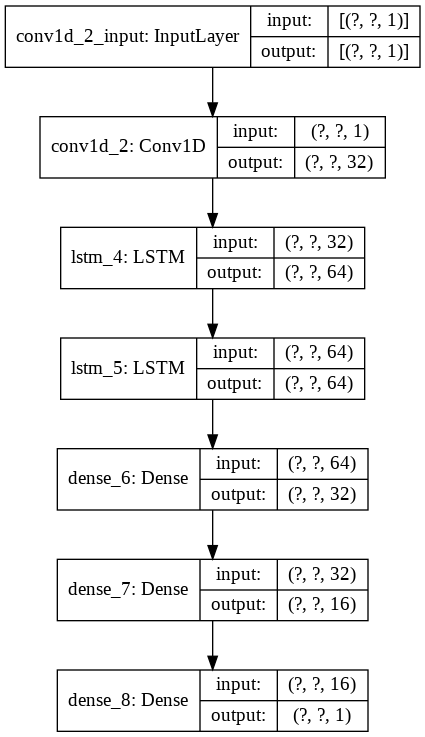

In [269]:
model_plot = 'Time-Series-Prediction-Weather-data-Madrid-v5.png'
tf.keras.utils.plot_model(model, to_file=model_plot, show_shapes=True)

### Setup and train our model

In [270]:
checkpoint_filepath = 'Time-Series-Prediction-Weather-data-Madrid-v5.h5'

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_filepath, verbose=0, save_weights_only=True, 
                                                      monitor='val_loss', mode='auto', save_best_only=True)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')

In [271]:
history_v5 = model.fit(train_set,
                       validation_data = validation_set,
                       epochs=100,
                       verbose=1,
                       callbacks=[model_checkpoint, early_stopping])

Epoch 1/100
13/13 [==============================] - 1s 72ms/step - loss: 0.1890 - mae: 0.3698 - val_loss: 0.0877 - val_mae: 0.2514
Epoch 2/100
13/13 [==============================] - 0s 35ms/step - loss: 0.0551 - mae: 0.1804 - val_loss: 0.0402 - val_mae: 0.1454
Epoch 3/100
13/13 [==============================] - 0s 34ms/step - loss: 0.0323 - mae: 0.1328 - val_loss: 0.0273 - val_mae: 0.1180
Epoch 4/100
13/13 [==============================] - 0s 31ms/step - loss: 0.0212 - mae: 0.1039 - val_loss: 0.0176 - val_mae: 0.0929
Epoch 5/100
13/13 [==============================] - 0s 33ms/step - loss: 0.0155 - mae: 0.0892 - val_loss: 0.0141 - val_mae: 0.0843
Epoch 6/100
13/13 [==============================] - 0s 35ms/step - loss: 0.0126 - mae: 0.0814 - val_loss: 0.0118 - val_mae: 0.0785
Epoch 7/100
13/13 [==============================] - 0s 34ms/step - loss: 0.0109 - mae: 0.0768 - val_loss: 0.0103 - val_mae: 0.0745
Epoch 8/100
13/13 [==============================] - 0s 34ms/step - loss: 0.

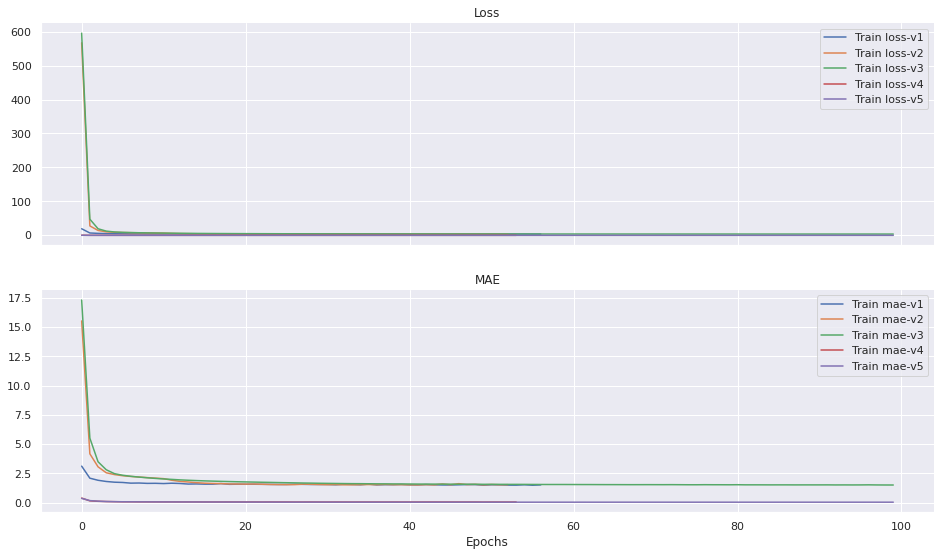

In [274]:
plot_multiple_results([history_v1, history_v2, history_v3, history_v4, history_v5], offset=0)

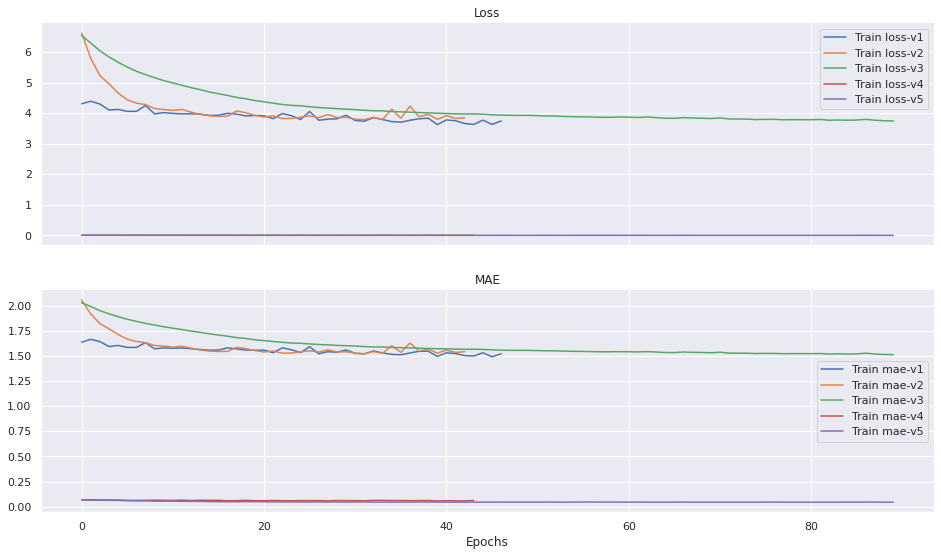

In [275]:
plot_multiple_results([history_v1, history_v2, history_v3, history_v4, history_v5], offset=10)

In [276]:
rnn_forecast = model_forecast(model, norm_series[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

In [277]:
rnn_forecast

array([0.1775623 , 0.24288988, 0.2584255 , ..., 0.30402496, 0.30549428,
       0.3070901 ], dtype=float32)

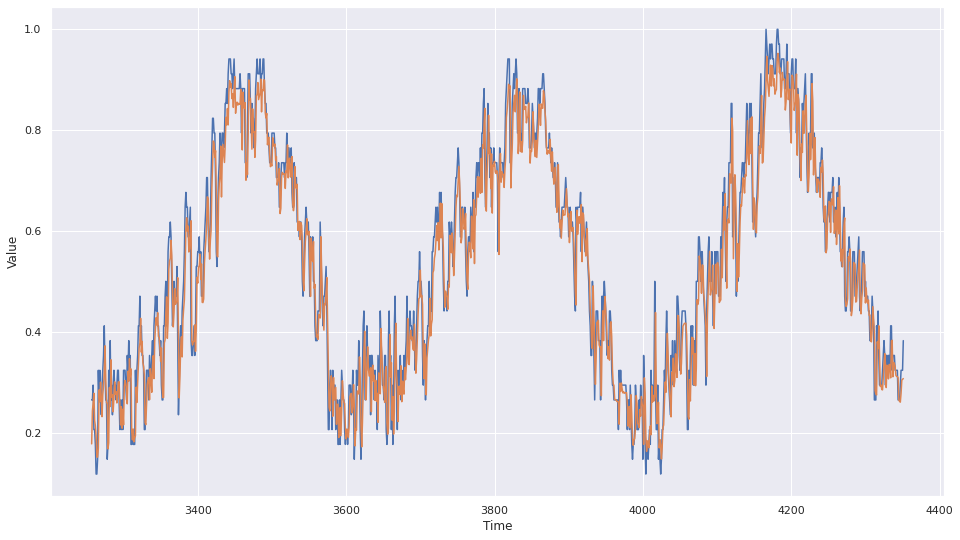

In [282]:
plt.figure(figsize=(16, 9))
plot_series(time_test, x_test)
plot_series(time_test, rnn_forecast)

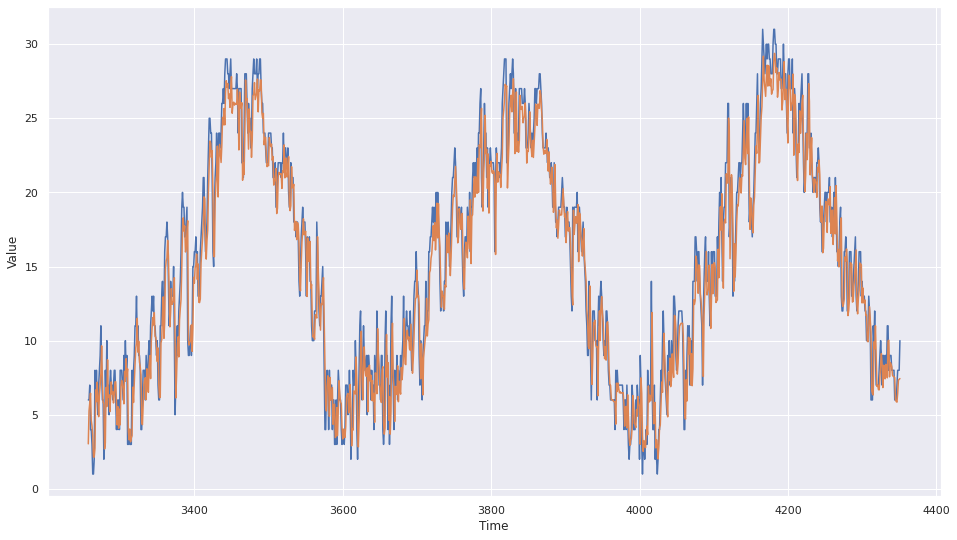

In [283]:
plt.figure(figsize=(16, 9))
plot_series(time_test, inverse_normalize_series(x_test, min_x_train, max_x_train))
plot_series(time_test, inverse_normalize_series(rnn_forecast, min_x_train, max_x_train))

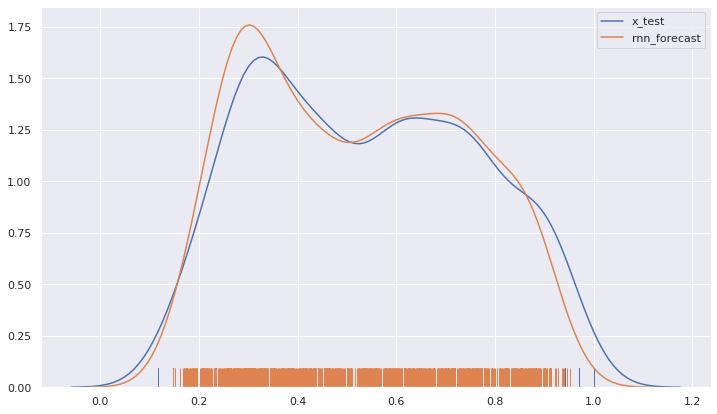

In [284]:
sns.distplot(x_test, hist=False, rug=True, label='x_test')
sns.distplot(rnn_forecast, hist=False, rug=True, label='rnn_forecast')
plt.show()

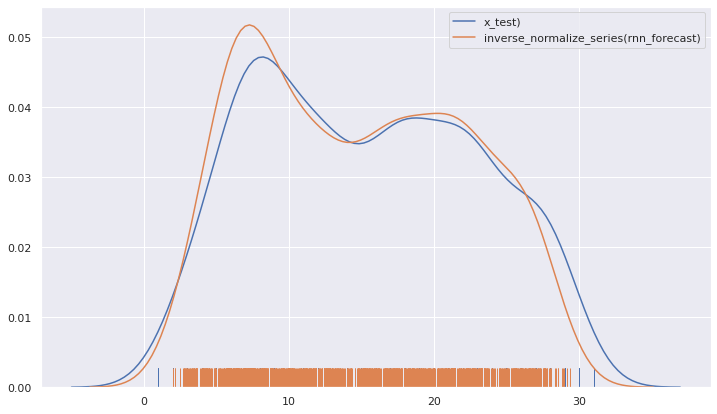

In [285]:
sns.distplot(inverse_normalize_series(x_test, min_x_train, max_x_train), hist=False, rug=True, label='x_test)')
sns.distplot(inverse_normalize_series(rnn_forecast, min_x_train, max_x_train), hist=False, rug=True, label='inverse_normalize_series(rnn_forecast)')
plt.show()

### MAE and MSE on test set

In [287]:
tf.keras.metrics.mean_absolute_error(x_test.reshape(-1), rnn_forecast).numpy()

0.04723693

In [291]:
tf.keras.metrics.mean_squared_error(x_test.reshape(-1), rnn_forecast).numpy()

0.0035665873

In [296]:
mae = tf.keras.metrics.mean_absolute_error(inverse_normalize_series(x_test, min_x_train, max_x_train).reshape(-1),
                                           inverse_normalize_series(rnn_forecast, min_x_train, max_x_train)).numpy()
mae

1.6060555

In [295]:
mse = tf.keras.metrics.mean_squared_error(inverse_normalize_series(x_test, min_x_train, max_x_train).reshape(-1), 
                                          inverse_normalize_series(rnn_forecast, min_x_train, max_x_train)).numpy()
mse

4.122975

In [297]:
report.loc[len(report)] = ['Univariate Conv1D, 2x LSTM, 3 layer DNN 16 + Adam + Normalization', mae, mse]

In [298]:
report

Model       MAE       MSE
0                    Univariate 3 layer DNN 10 + SGD  2.008685  6.347851
1   Univariate Conv1D, 2x LSTM, 3 layer DNN 10 + SGD  1.801992  5.175402
2                   Univariate 3 layer DNN 16 + Adam  1.616005  4.373547
3  Univariate Conv1D, 2x LSTM, 3 layer DNN 16 + Adam  1.548840  4.069838
4          Univariate 2x LSTM, 3 layer DNN 16 + Adam  1.508536  3.809149
5  Univariate 3 layer DNN 16 + Adam + Normalizati...  1.970898  5.823823
6  Univariate Conv1D, 2x LSTM, 3 layer DNN 16 + A...  1.606055  4.122975

## Model v6 - Normalization + 3 layer DNN, scikit-learn Scaling, BatchNorm - MAE: 4.1

### Excellent article on normalizing and standardizing input and out features
How to use Data Scaling Improve Deep Learning Model Stability and Performance  
https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling


![alt text](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2018/11/Box-and-Whisker-Plots-of-Mean-Squared-Error-With-Unscaled-Normalized-and-Standardized-Input-Variables-for-the-Regression-Problem.png)

In [299]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [300]:
# prepare dataset with input and output scalers, can be none
def get_scale_dataset(series, input_output_scaler):
  # generate dataset
  split_time = dataset[dataset['Date'] == '2012-12-31'].index[0] + 1
  time_train = time[:split_time]
  x_train = series[:split_time]

  time_test = time[split_time:]
  x_test = series[split_time:]

  validation_split_time = dataset[dataset['Date'] == '2010-12-31'].index[0] + 1
  time_valid = time_train[validation_split_time:]
  x_valid = x_train[validation_split_time:]

  # scale inputs and outputs due to the preprocessing method we used to generate input and output pairs
  if input_output_scaler is not None:
	  # reshape 1d arrays to 2d arrays
    print(x_train.shape)
    x_train = x_train.reshape(-1, 1)
    print(x_train.shape)
    # fit scaler
    input_output_scaler.fit(x_train)
    # transform training dataset
    x_train = input_output_scaler.transform(x_train)
    # transform validation dataset
    x_valid = x_valid.reshape(-1, 1)
    x_valid = input_output_scaler.transform(x_valid)
		# transform test dataset
    x_test = x_test.reshape(-1, 1)
    x_test = input_output_scaler.transform(x_test)
  #if output_scaler is not None:
		# reshape 1d arrays to 2d arrays
		#trainy = trainy.reshape(len(trainy), 1)
		#testy = testy.reshape(len(trainy), 1)

  return x_train, x_valid, x_test

### Normalize Mean TemperatureC

In [301]:
input_output_scaler = MinMaxScaler()
x_train, x_valid, x_test = get_scale_dataset(series, input_output_scaler)

(3257,)
(3257, 1)


In [302]:
series[:split_time].shape

(3257,)

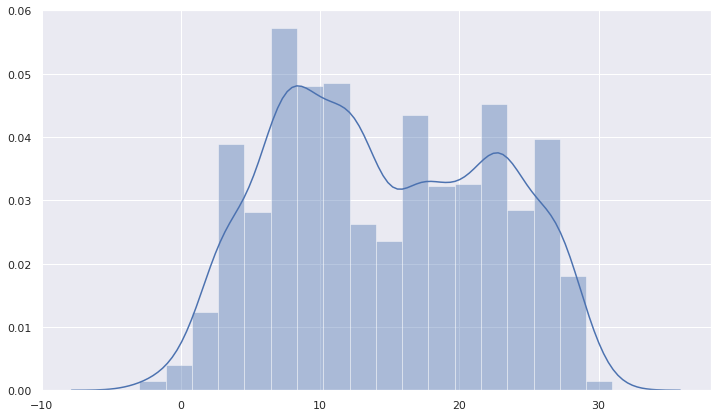

In [303]:
sns.set(rc={'figure.figsize':(12,7)})
sns.distplot(series[:split_time]);

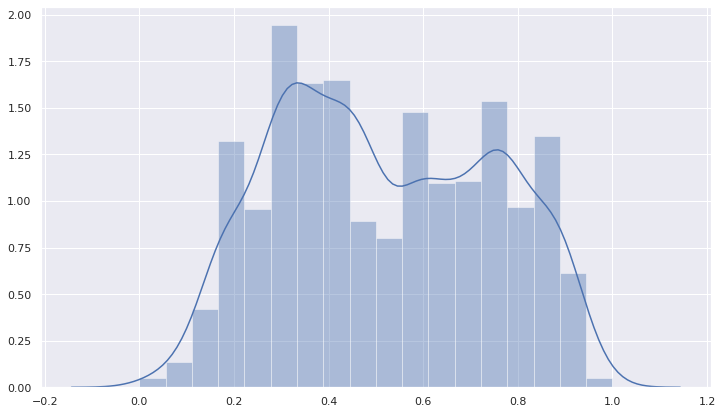

In [304]:
sns.distplot(x_train);

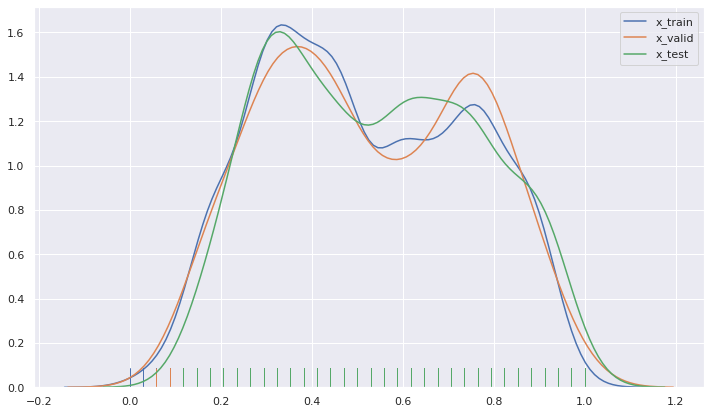

In [305]:
sns.distplot(x_train, hist=False, rug=True, label='x_train')
sns.distplot(x_valid, hist=False, rug=True, label='x_valid')
sns.distplot(x_test, hist=False, rug=True, label='x_test')
plt.show()

### Hyperparameter tuning

In [306]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

window_size = 30
batch_size = 32
shuffle_buffer_size = 1000

train_set =      windowed_dataset_dnn(x_train, window_size, batch_size, shuffle_buffer_size)
validation_set = windowed_dataset_dnn(x_valid, window_size, batch_size, shuffle_buffer_size)
test_set =       windowed_dataset_dnn(x_test, window_size, batch_size, shuffle_buffer_size)

In [307]:
x_train.shape

(3257, 1)

In [308]:
train_set

<PrefetchDataset shapes: ((None, None, 1), (None, 1)), types: (tf.float64, tf.float64)>

### Model architecture

In [309]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, input_shape=[window_size, 1], activation="relu"), #input_shape needs a ,1 due to get_scale_dataset
    tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

#model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-7, momentum=0.9), metrics=['mae']) 
model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(), metrics=['mae'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30, 32)            64        
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 32)            128       
_________________________________________________________________
dense_1 (Dense)              (None, 30, 16)            528       
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 16)            64        
_________________________________________________________________
dense_2 (Dense)              (None, 30, 1)             17        
Total params: 801
Trainable params: 705
Non-trainable params: 96
_________________________________________________________________


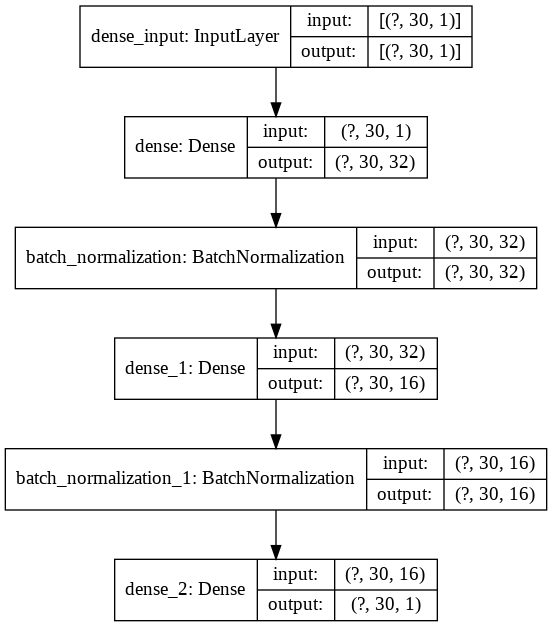

In [310]:
model_plot = 'Time-Series-Prediction-Weather-data-Madrid-v6.png'
tf.keras.utils.plot_model(model, to_file=model_plot, show_shapes=True)

### Setup and train our model

In [311]:
checkpoint_filepath = 'Time-Series-Prediction-Weather-data-Madrid-v6.h5'

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_filepath, verbose=0, save_weights_only=True, 
                                                      monitor='val_loss', mode='auto', save_best_only=True)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')

In [312]:
history_v6 = model.fit(train_set,
                       validation_data = validation_set,
                       epochs=100,
                       verbose=1,
                       callbacks=[model_checkpoint, early_stopping])

Epoch 1/100
101/101 [==============================] - 1s 8ms/step - loss: 0.1461 - mae: 0.3134 - val_loss: 0.0682 - val_mae: 0.2109
Epoch 2/100
101/101 [==============================] - 1s 6ms/step - loss: 0.0201 - mae: 0.1131 - val_loss: 0.0379 - val_mae: 0.1583
Epoch 3/100
101/101 [==============================] - 1s 7ms/step - loss: 0.0168 - mae: 0.1030 - val_loss: 0.0206 - val_mae: 0.1166
Epoch 4/100
101/101 [==============================] - 1s 7ms/step - loss: 0.0165 - mae: 0.1020 - val_loss: 0.0155 - val_mae: 0.0986
Epoch 5/100
101/101 [==============================] - 1s 6ms/step - loss: 0.0169 - mae: 0.1032 - val_loss: 0.0193 - val_mae: 0.1093
Epoch 6/100
101/101 [==============================] - 1s 6ms/step - loss: 0.0165 - mae: 0.1018 - val_loss: 0.0313 - val_mae: 0.1399
Epoch 7/100
101/101 [==============================] - 1s 7ms/step - loss: 0.0167 - mae: 0.1027 - val_loss: 0.0208 - val_mae: 0.1135
Epoch 8/100
101/101 [==============================] - 1s 7ms/step - 

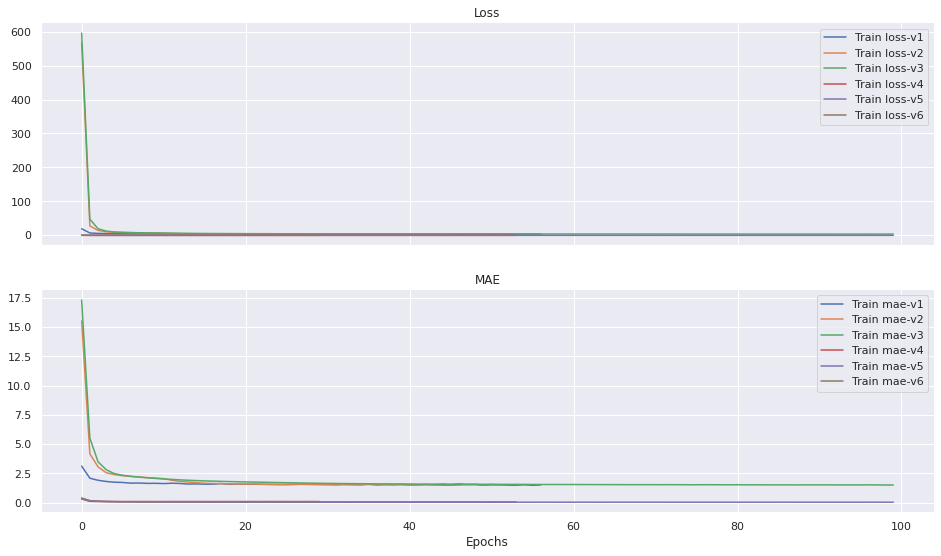

In [313]:
plot_multiple_results([history_v1, history_v2, history_v3, history_v4, history_v5, history_v6], offset=0)

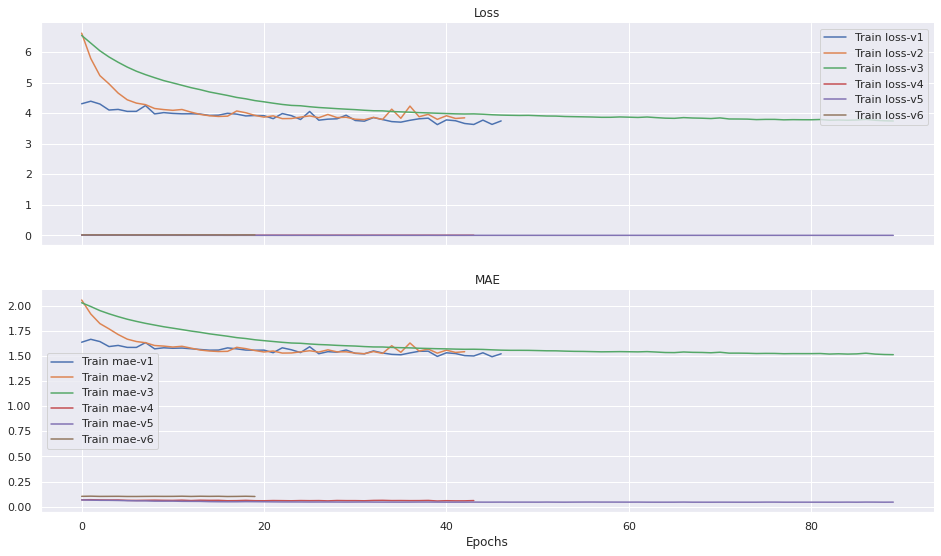

In [314]:
plot_multiple_results([history_v1, history_v2, history_v3, history_v4, history_v5, history_v6], offset=10)

In [315]:
forecast = model_forecast(model, norm_series, window_size)
results = forecast[split_time - window_size:-1, 0]

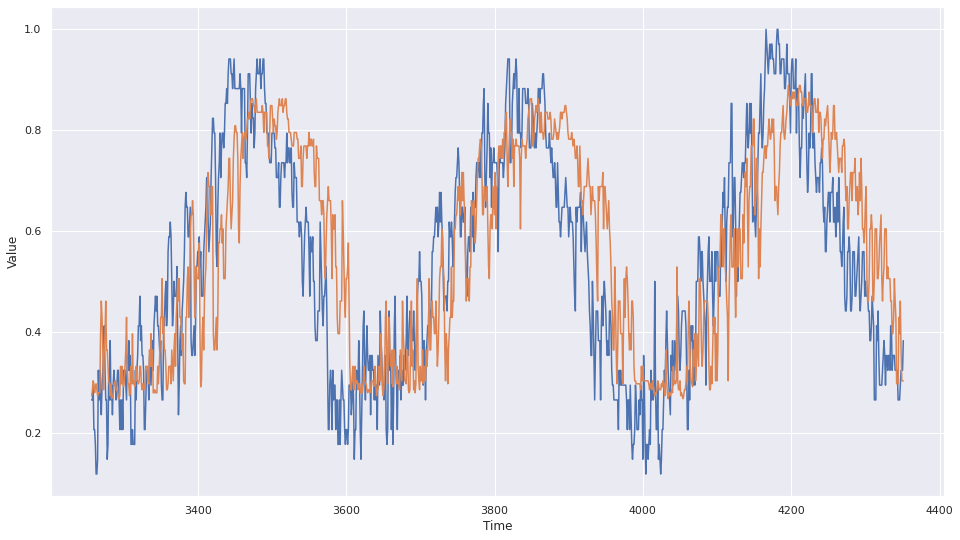

In [316]:
plt.figure(figsize=(16, 9))
plot_series(time_test, x_test)
plot_series(time_test, results)

In [317]:
inverse_x_test = input_output_scaler.inverse_transform(x_test)
inverse_results = input_output_scaler.inverse_transform(results)

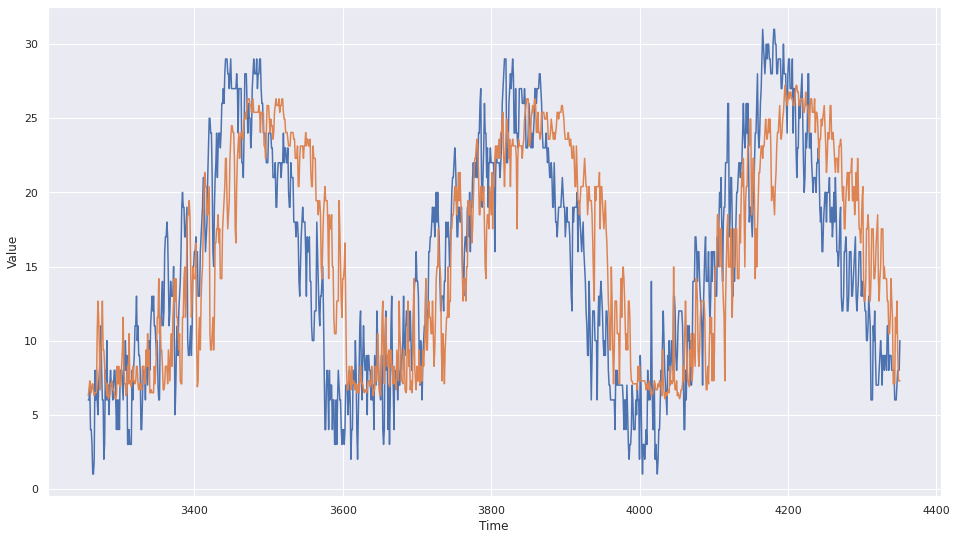

In [318]:
plt.figure(figsize=(16, 9))
plot_series(time_test, inverse_x_test)
plot_series(time_test, inverse_results)

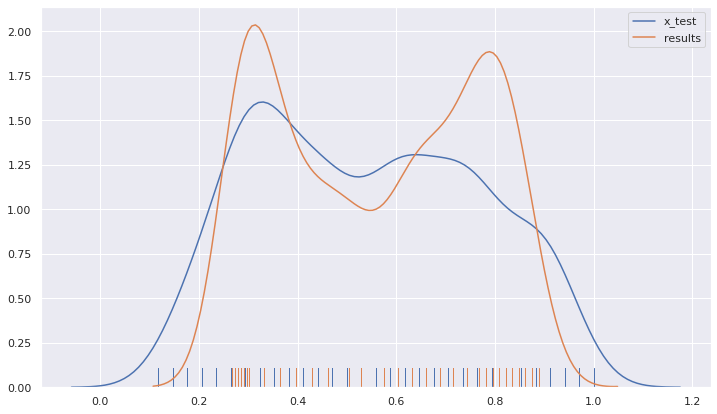

In [319]:
sns.distplot(x_test, hist=False, rug=True, label='x_test')
sns.distplot(results, hist=False, rug=True, label='results')
plt.show()

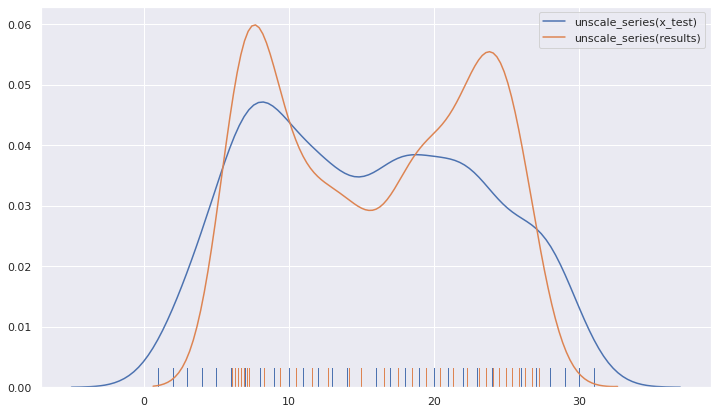

In [320]:
sns.distplot(inverse_x_test, hist=False, rug=True, label='unscale_series(x_test)')
sns.distplot(inverse_results, hist=False, rug=True, label='unscale_series(results)')
plt.show()

### MAE and MSE on test set

In [321]:
tf.keras.metrics.mean_absolute_error(x_test.reshape(-1), results.reshape(-1)).numpy()

0.1201425

In [322]:
tf.keras.metrics.mean_squared_error(x_test.reshape(-1), results.reshape(-1)).numpy()

0.022349147

In [323]:
mae = tf.keras.metrics.mean_absolute_error(inverse_x_test.reshape(-1), inverse_results.reshape(-1)).numpy()
mae

4.0848455

In [324]:
mse = tf.keras.metrics.mean_squared_error(inverse_x_test.reshape(-1), inverse_results.reshape(-1)).numpy()
mse

25.835617

In [325]:
report.loc[len(report)] = ['Univariate 3 layer DNN 16 + Adam + Scaling + BatchNorm', mae, mse]

In [327]:
report

Model       MAE        MSE
0                    Univariate 3 layer DNN 10 + SGD  2.008685   6.347851
1   Univariate Conv1D, 2x LSTM, 3 layer DNN 10 + SGD  1.801992   5.175402
2                   Univariate 3 layer DNN 16 + Adam  1.616005   4.373547
3  Univariate Conv1D, 2x LSTM, 3 layer DNN 16 + Adam  1.548840   4.069838
4          Univariate 2x LSTM, 3 layer DNN 16 + Adam  1.508536   3.809149
5  Univariate 3 layer DNN 16 + Adam + Normalizati...  1.970898   5.823823
6  Univariate Conv1D, 2x LSTM, 3 layer DNN 16 + A...  1.606055   4.122975
7  Univariate 3 layer DNN 16 + Adam + Scaling + B...  4.084846  25.835617

In [326]:
#remove BN 
#scale only train statistics 

### Plot results of all our models 😀

In [329]:
#report = pd.DataFrame(columns=['Model', 'MAE', 'MSE'])

In [330]:
#report.loc[len(report)] = ['Univariate 3 layer DNN 10 + SGD', 2.008685, 6.347851]
#report.loc[len(report)] = ['Univariate Conv1D, 2x LSTM, 3 layer DNN 10 + SGD', 1.801992, 5.175402]
#report.loc[len(report)] = ['Univariate 3 layer DNN 16 + Adam', 1.613133, 4.363622]
#report.loc[len(report)] = ['Univariate Conv1D, 2x LSTM, 3 layer DNN 16 + Adam', 1.552597, 4.086871]

#report.loc[len(report)] = ['Univariate 3 layer DNN 16 + Adam, Scaling, BatchNorm', 1.6301479, 4.2752976]
#report.loc[len(report)] = ['Univariate Conv1D, 2x LSTM, 3 layer DNN 16 + Adam, Scaling, BatchNorm', 1.5647494, 4.1166787]
#report.loc[len(report)] = ['Univariate 3 layer DNN 16 + Adam, scikit Scaling, BatchNorm', 4.118597, 27.738344]

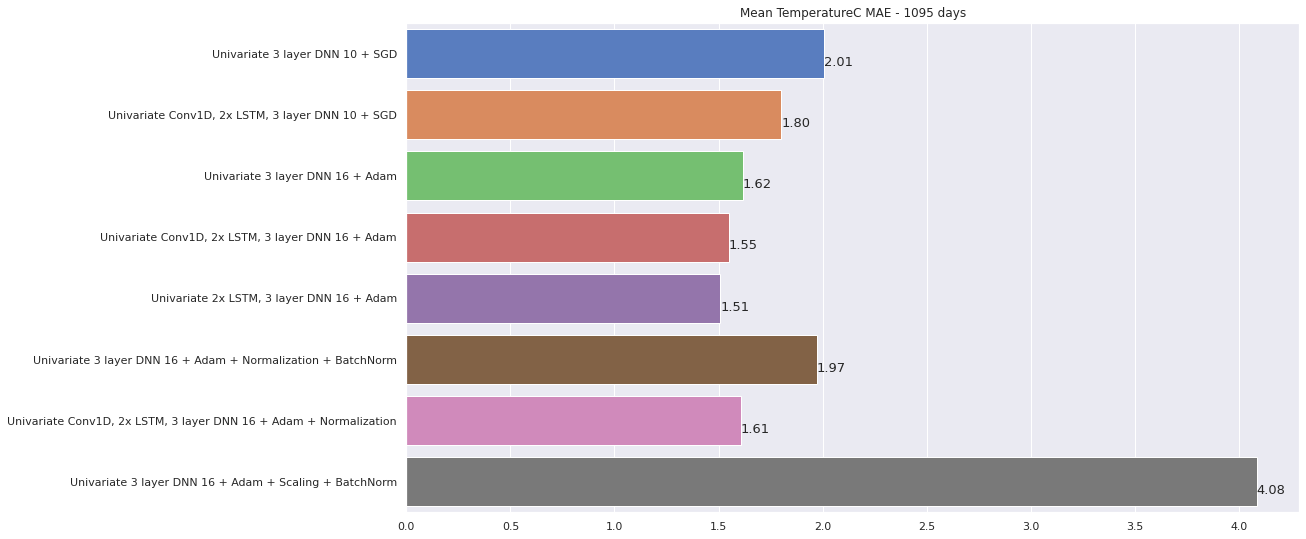

In [331]:
sns.set(rc={'figure.figsize':(16,9)})
ax = sns.barplot(report.MAE, report.Model, orient='h', palette=sns.color_palette("muted"))

for i, mae in enumerate(report.MAE):
    ax.text(mae, i+0.2, f'{mae:.2f}', fontsize=13)
plt.title(f'Mean TemperatureC MAE - {3*365} days')
plt.xlabel('')
plt.ylabel('')
plt.show()

### Extra things to consider after benchmark model above
1) Scale, Batchnormilize inputs and outputs   
2) Condiser using other features to predict Mean TemperatureC  
3) Consider using the entire time series dataset with the 127 missing days  
4) Do multivariate prediction, for example predict min, max and mean temperature from historical data  
5) Use statistical e.g. Arima based models  
6) Predict Events (weather description) from historical data and all features  
7) Use other time series libraries for univariate or multivariate prediction  